# Auswertung der Suchqualität für Programmiersprachen

Dieses Notebook definiert für verschiedene Beispielabfragen die erwarteten Treffer (Programmiersprachen), führt die Abfragen gegen verschiedene Solr-Cores aus, sammelt die Ergebnisse und visualisiert die Suchqualität (Precision, Recall, F1-Score) sowie deren Verbesserungen zwischen den Cores.

**Ablauf:**
1. Definition der erwarteten Treffer für jede Abfrage
2. Ausführung der Abfragen gegen verschiedene Solr-Cores und Sammeln der Ergebnisse
3. Speicherung der Auswertungsergebnisse als JSON
4. Visualisierung und Vergleich der Scores und Verbesserungen für jede Abfrage und jeden Core

### This are the expected hits for each querry

In [3]:
expected_langs = [
    {
        "standard_query": "title:Python",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "standard_query": "title:Python3",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "standard_query": "title:Python3.12",
        "expected_langs": [{"lang": "Python", "rank": 1}],
    },
    {
        "standard_query": "title:Go",
        "expected_langs": [{"lang": "Go", "rank": 1}],
    },
    {
        "standard_query": "title:Golang",
        "expected_langs": [{"lang": "Go", "rank": 1}],
    },
    {
        "standard_query": "document:functional",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "standard_query": "document:\"functional\" AND NOT document:\"object-oriented\"",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "standard_query": "document:declarative",
        "expected_langs": [
            {"lang": "Haskell",      "rank": 1},
            {"lang": "Elixir",       "rank": 2},
            {"lang": "Scala",        "rank": 3},
            {"lang": "R",            "rank": 4},
            {"lang": "Rust",         "rank": 5},
            {"lang": "Python",       "rank": 6},
            {"lang": "TypeScript",   "rank": 7},
            {"lang": "JavaScript",   "rank": 8},
            {"lang": "Kotlin",       "rank": 9},
            {"lang": "Swift",        "rank": 10},
            {"lang": "Lua",          "rank": 11},
            {"lang": "Ruby",         "rank": 12},
            {"lang": "Apache Groovy","rank": 13},
        ]
    },
    {
        "standard_query": "document:object-oriented",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "standard_query": "document:\"object-oriented\" AND NOT document:\"functional\"",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "standard_query": "document:imperative",
        "expected_langs": [
            {"lang": "Java",         "rank": 1},
            {"lang": "C Sharp",      "rank": 2},
            {"lang": "C++",          "rank": 3},
            {"lang": "Kotlin",       "rank": 4},
            {"lang": "Swift",        "rank": 5},
            {"lang": "Apache Groovy","rank": 6},
            {"lang": "Python",       "rank": 7},
            {"lang": "Ruby",         "rank": 8},
            {"lang": "TypeScript",   "rank": 9},
            {"lang": "JavaScript",   "rank": 10},
            {"lang": "PowerShell",   "rank": 11},
            {"lang": "Go",           "rank": 12},
            {"lang": "Rust",         "rank": 13},
            {"lang": "Dart",         "rank": 14},
            {"lang": "Scala",        "rank": 15},
            {"lang": "Mathlab",      "rank": 16},
            {"lang": "Lua",          "rank": 17}
        ]
    },
    {
        "standard_query": "title:C#",
        "expected_langs": [{"lang": "C Sharp", "rank": 1}],
    },
    {
        "standard_query": "title:\"C Sharp\"",
        "expected_langs": [{"lang": "C Sharp", "rank": 1}],
    },
    {
        "standard_query": "title:C++",
        "expected_langs": [
            {"lang": "C++", "rank": 1},
            {"lang": "C",   "rank": 2}
        ],
    },
    {
        "standard_query": "title:\"C plus plus\"",
        "expected_langs": [
            {"lang": "C++", "rank": 1},
            {"lang": "C",   "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"JavaScript framework\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Javascrit framework\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"most modern programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "standard_query": "document:\"modern programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "standard_query": "document:\"trendy programming languages\"",
        "expected_langs": [
            {"lang": "Rust",       "rank": 1},
            {"lang": "Go",         "rank": 2},
            {"lang": "Swift",      "rank": 3},
            {"lang": "Kotlin",     "rank": 4},
            {"lang": "TypeScript", "rank": 5},
            {"lang": "Dart",       "rank": 6},
            {"lang": "Zig",        "rank": 7},
            {"lang": "Elixir",     "rank": 8}
        ]
    },
    {
        "standard_query": "document:\"What is the best programming language for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Top programming languages for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Best coding languages for building websites\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Best programming language for web development\"",
        "expected_langs": [
            {"lang": "JavaScript", "rank": 1},
            {"lang": "TypeScript", "rank": 2}
        ],
    },
    {
        "standard_query": "document:\"Best systems programming language for safety\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3},
            {"lang": "Go",     "rank": 4}
        ]
    },
    {
        "standard_query": "document:\"What is a memory-safe programming language\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3}
        ]
    },
    {
        "standard_query": "document:\"Most secure programming language\"",
        "expected_langs": [
            {"lang": "Rust", "rank": 1}
        ]
    },
    # Additional querries Metadata evaluation
    {
        "standard_query": "document:\"memory-safe\"",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3}
        ]
    },
    {
        "standard_query": "document:\"memory-safe\" AND memory_management:*",
        "expected_langs": [
            {"lang": "Rust",   "rank": 1},
            {"lang": "Swift",  "rank": 2},
            {"lang": "Zig",    "rank": 3}
        ]
    }
]


In [4]:
from core import evaluate_case, EvaluationResult

# Beispiel: core und Konfiguration
cores = ["ProgLang24", "ProgLang24_2"] # "ProgLang24_6"

results = []
for core in cores:
    solr_url = f'http://10.248.16.116:8983/solr/{core}/select'
    for case in expected_langs:
        result: EvaluationResult = evaluate_case(case, solr_url, core, facets=None)
        results.append(result)


DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Python'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Python3'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Python3.12'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Go'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'title:Golang'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:functional'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:"functional" AND NOT document:"object-oriented"'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:declarative'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:"functional" AND NOT document:"object-oriented"'}
Ranking-Abgleich:
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:declarativ

In [5]:
import json

with open("./results/results-f1.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

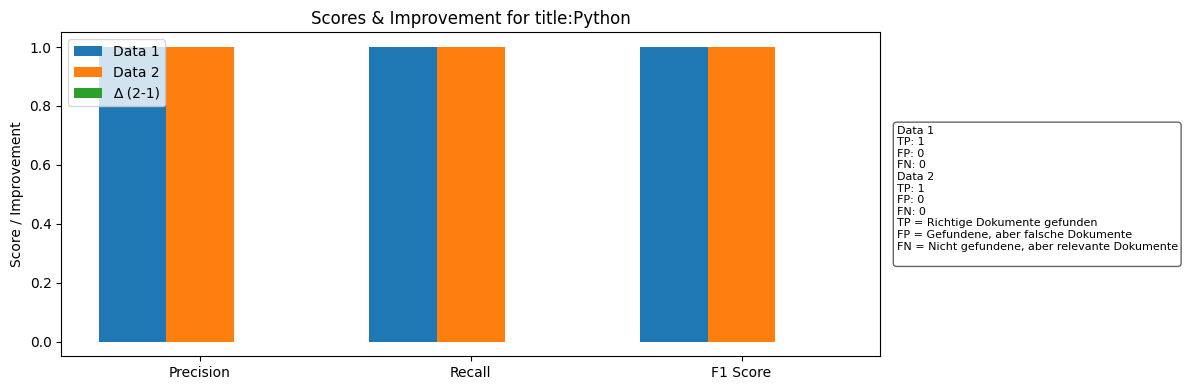

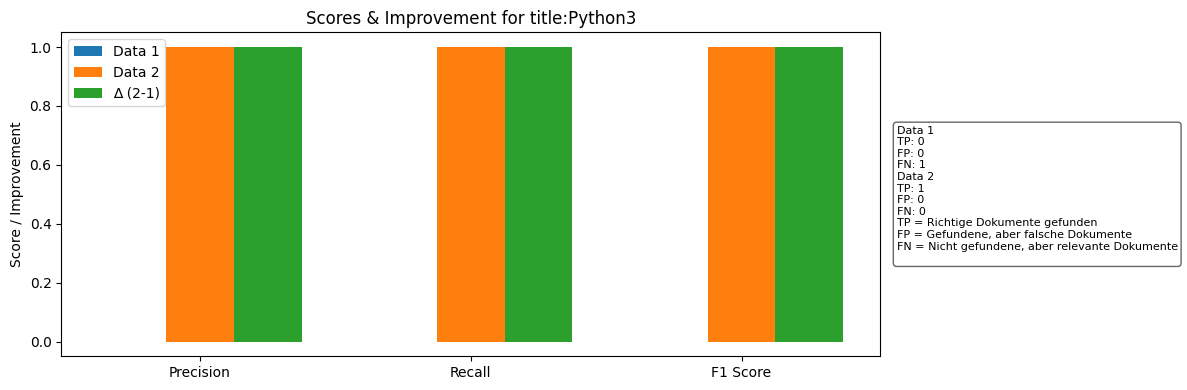

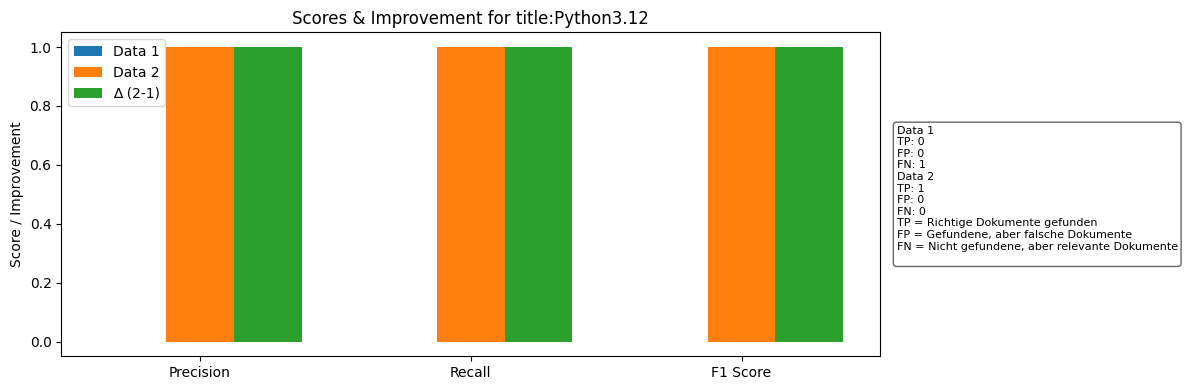

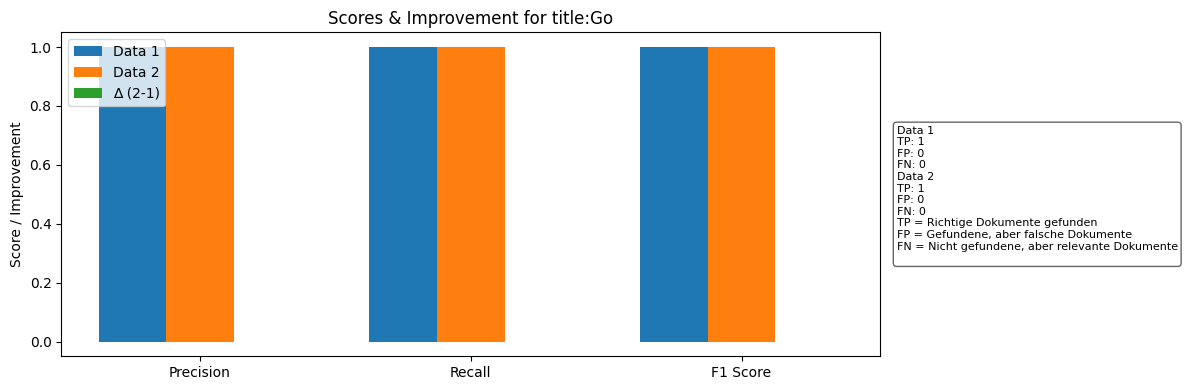

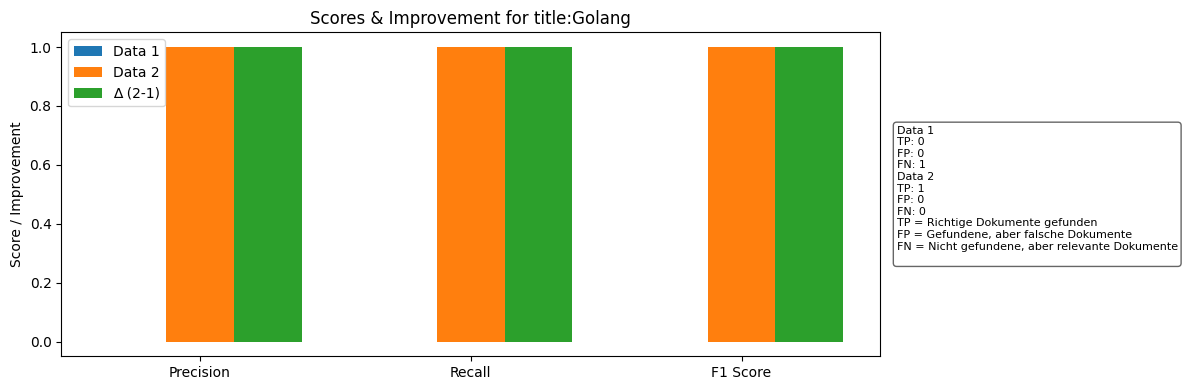

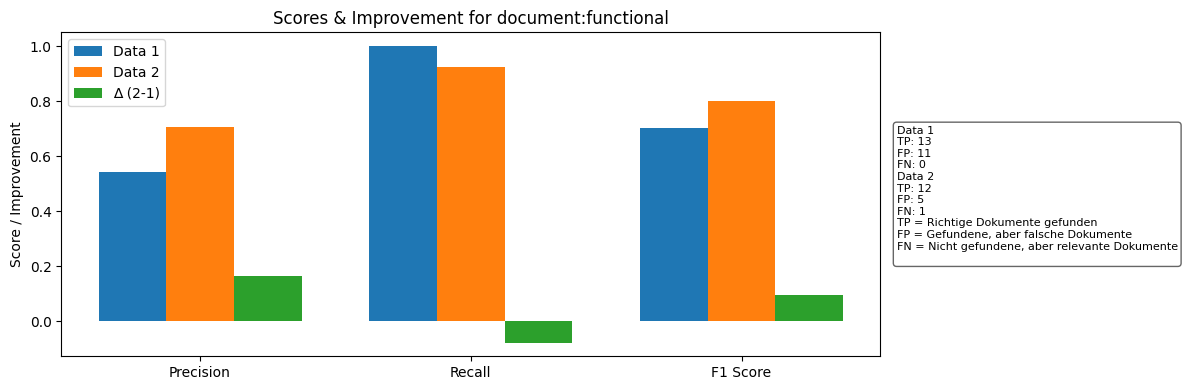

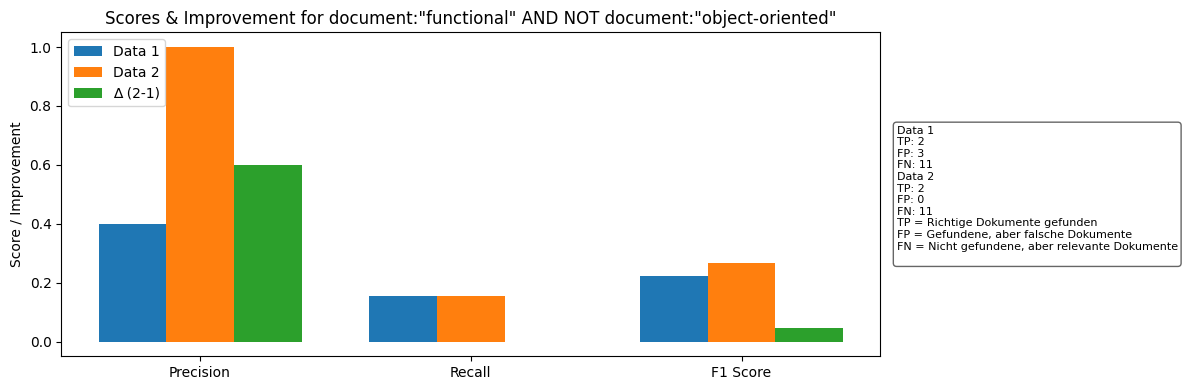

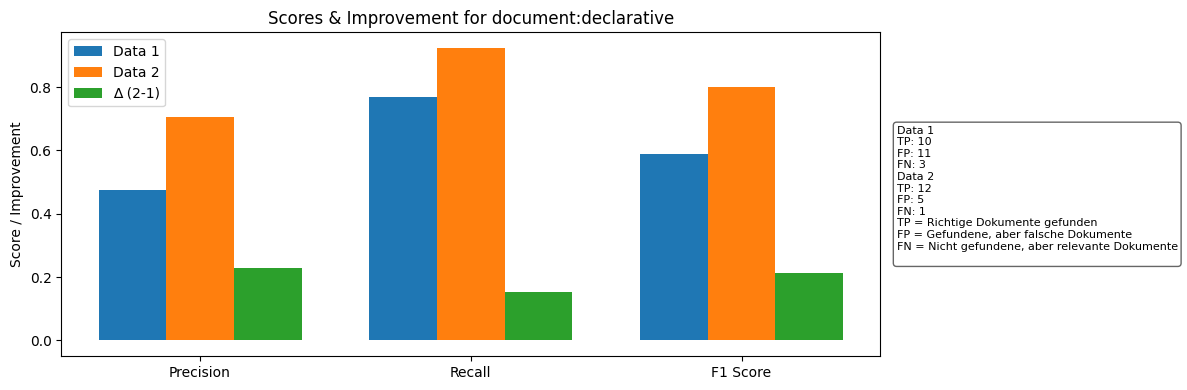

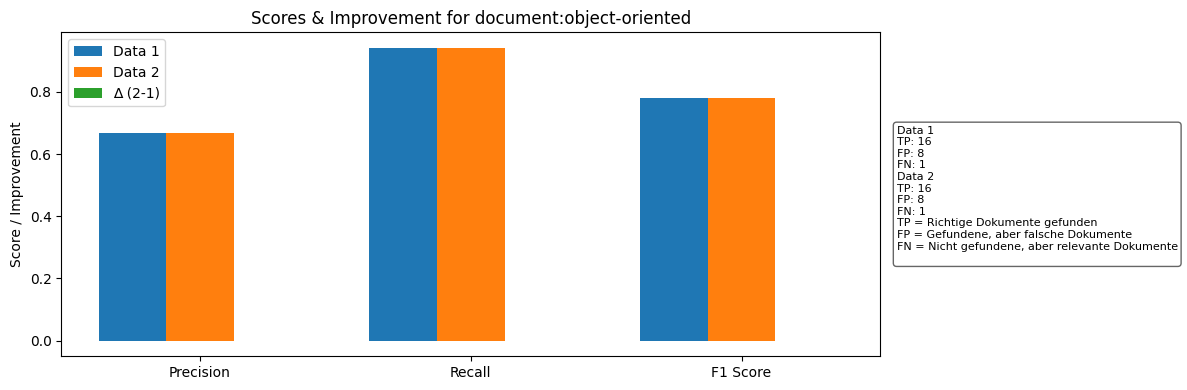

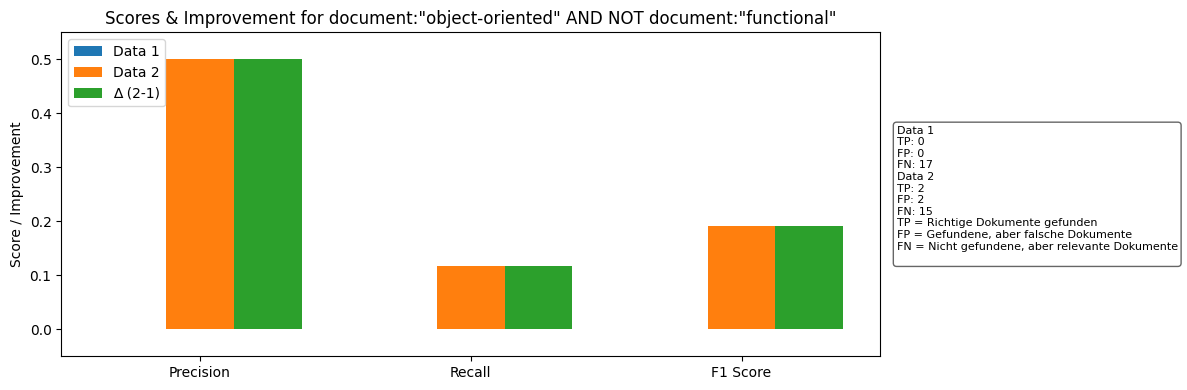

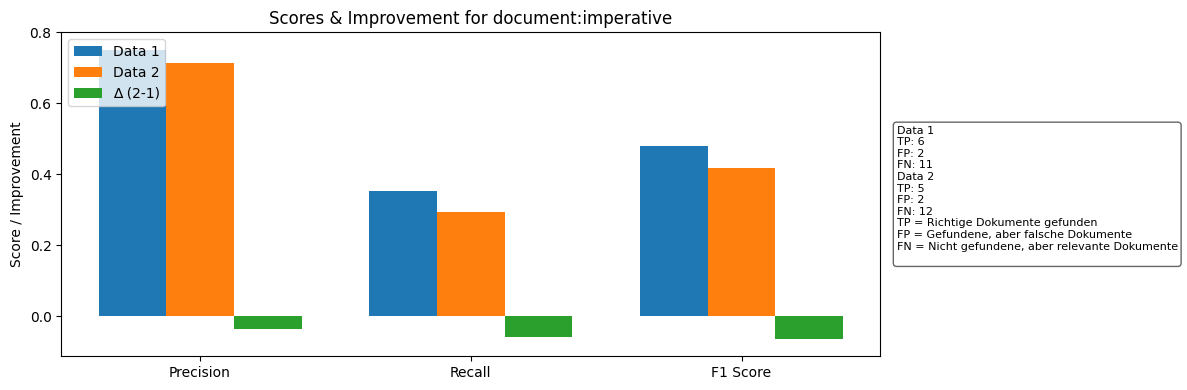

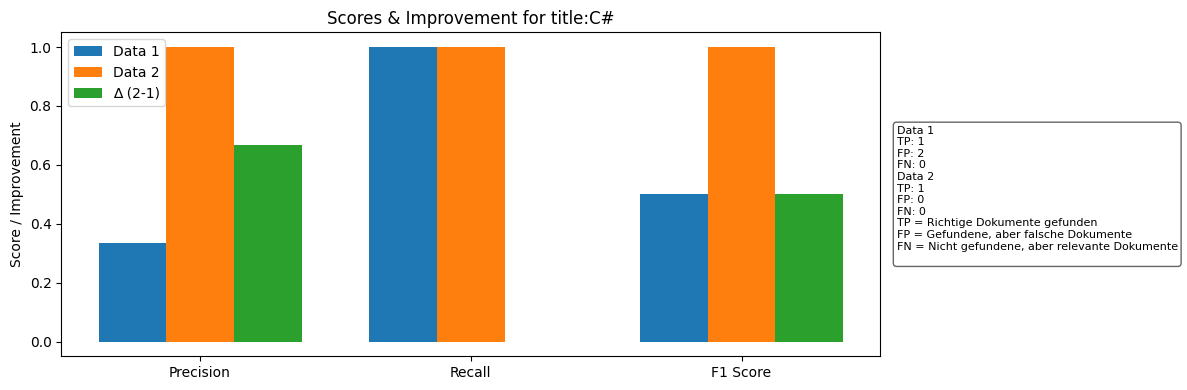

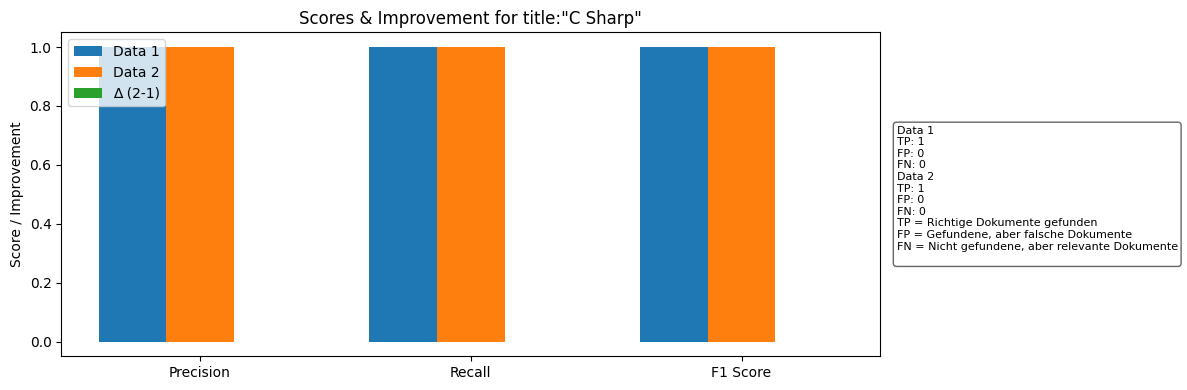

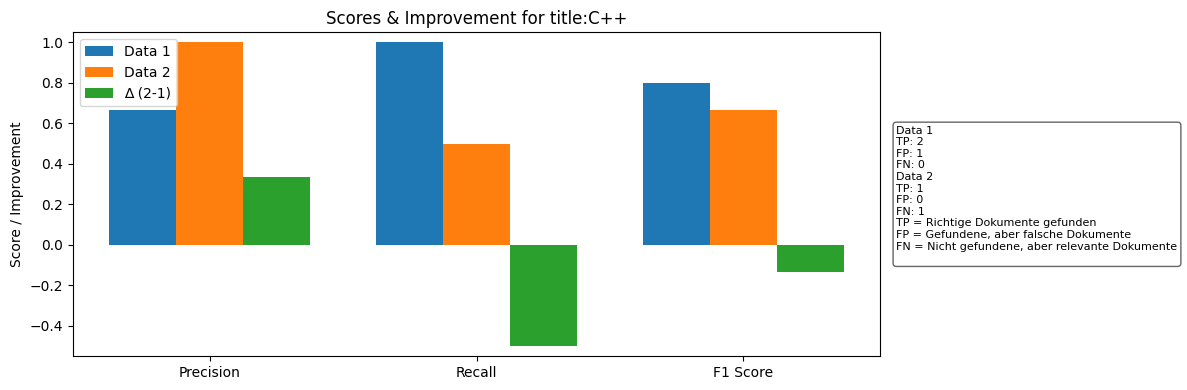

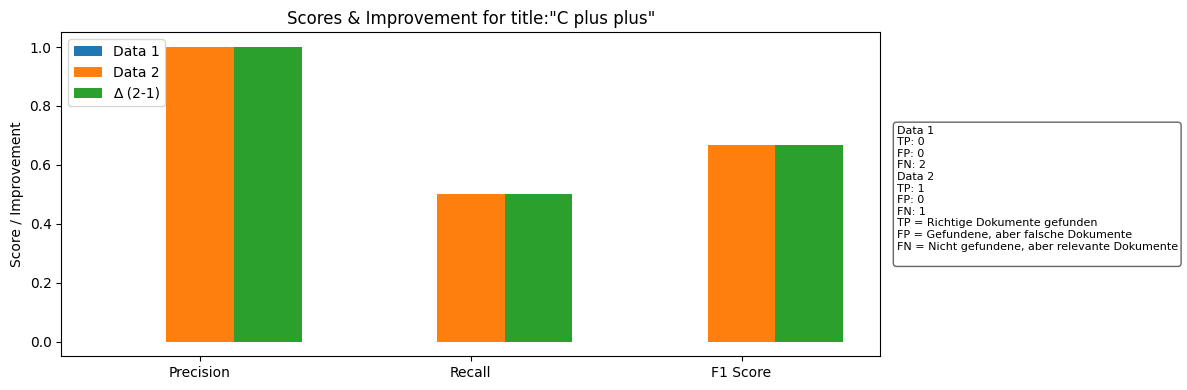

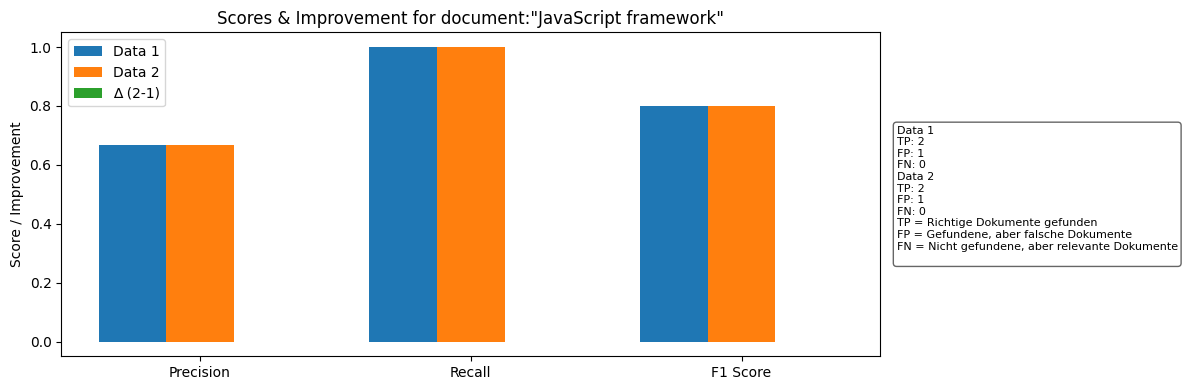

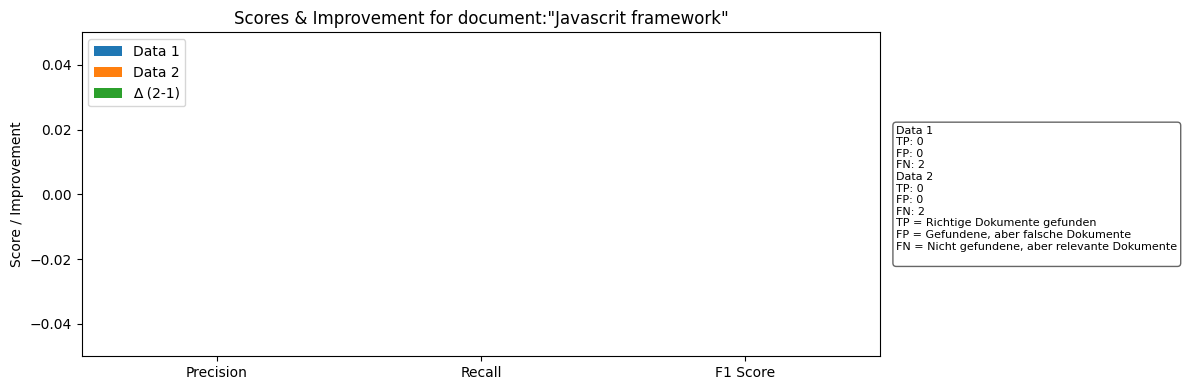

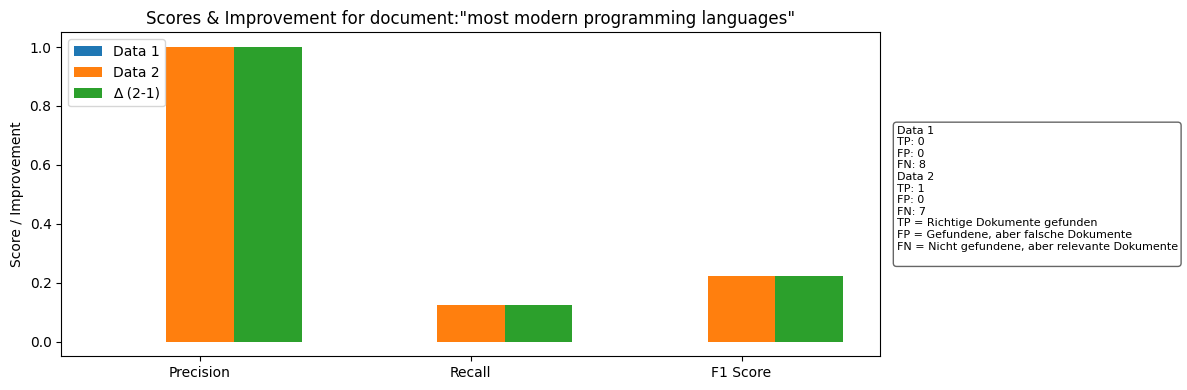

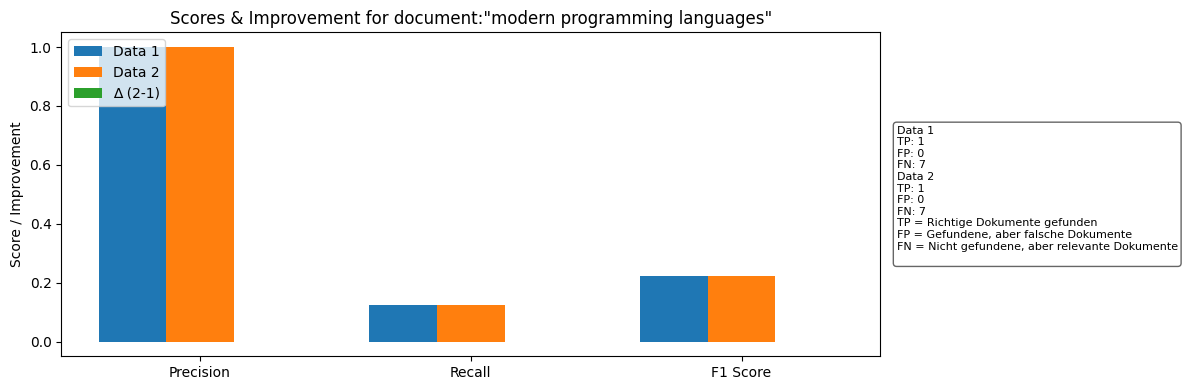

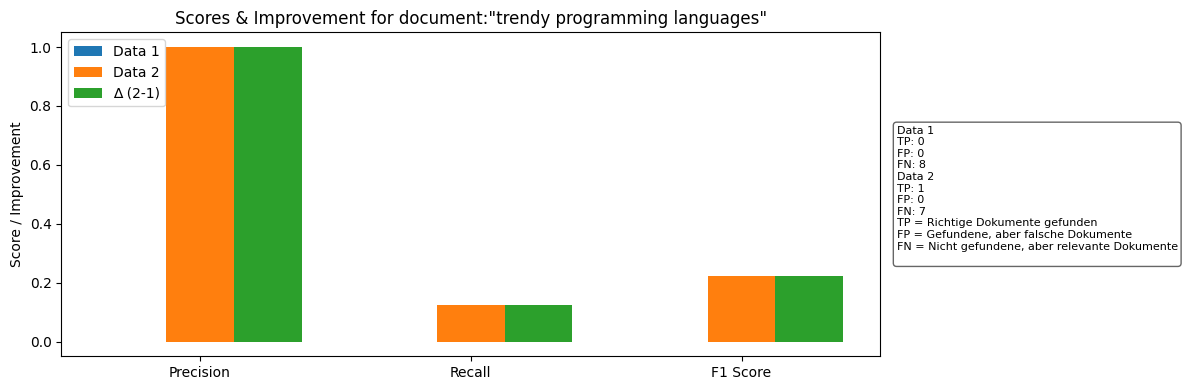

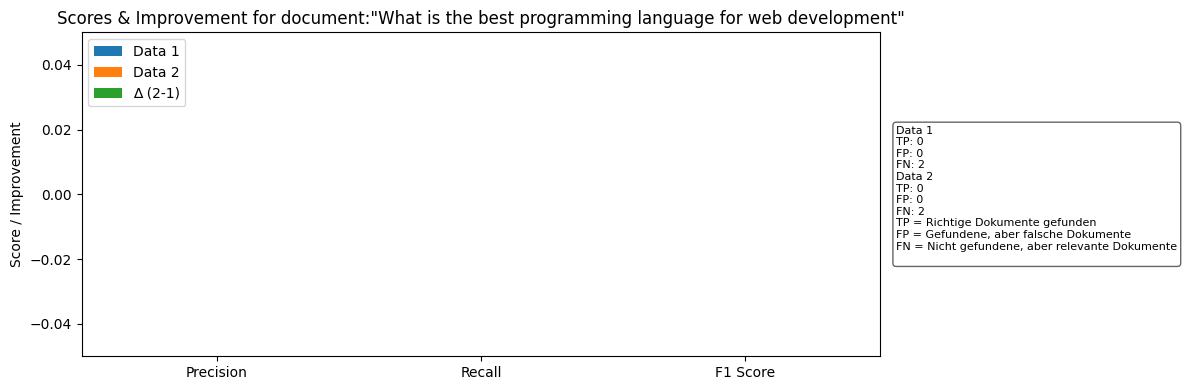

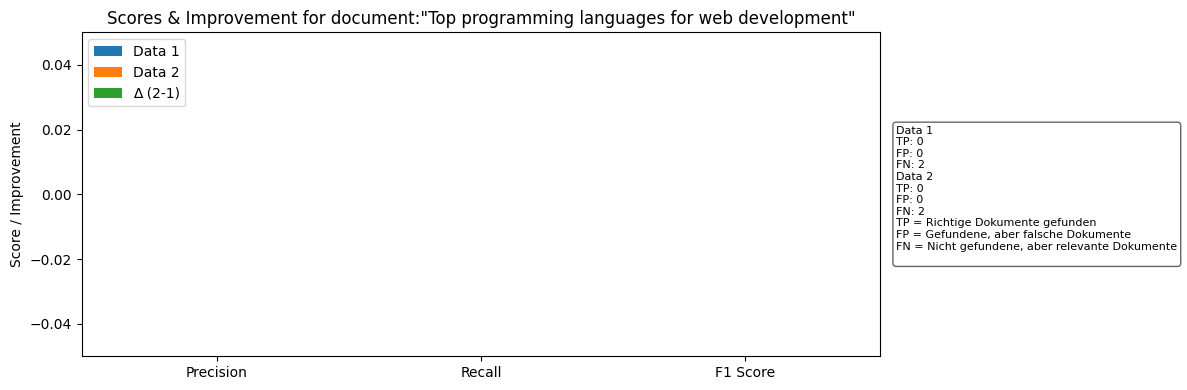

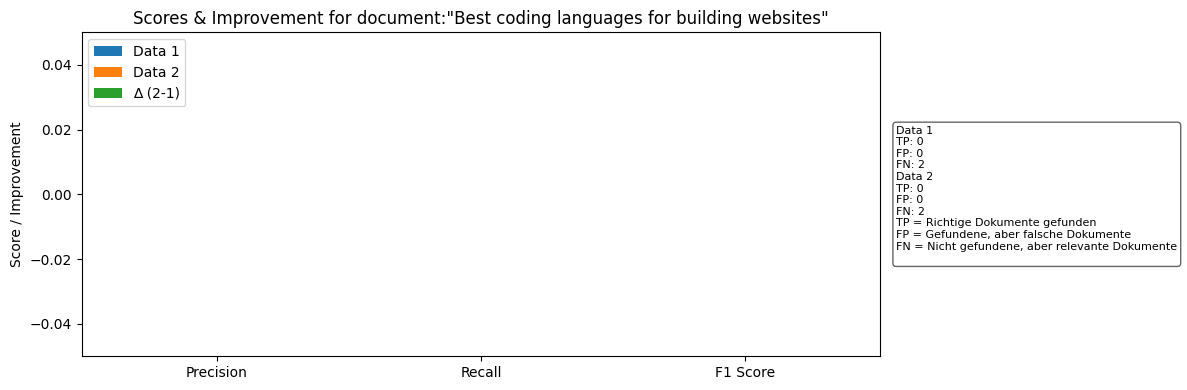

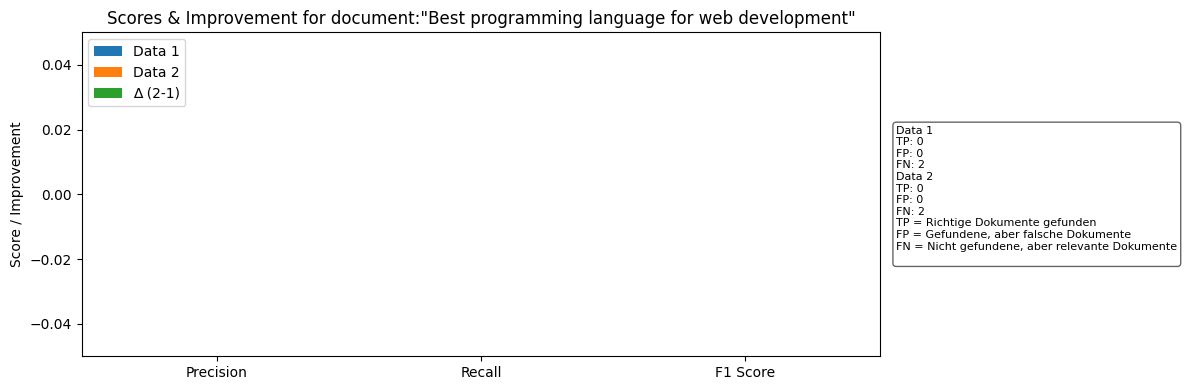

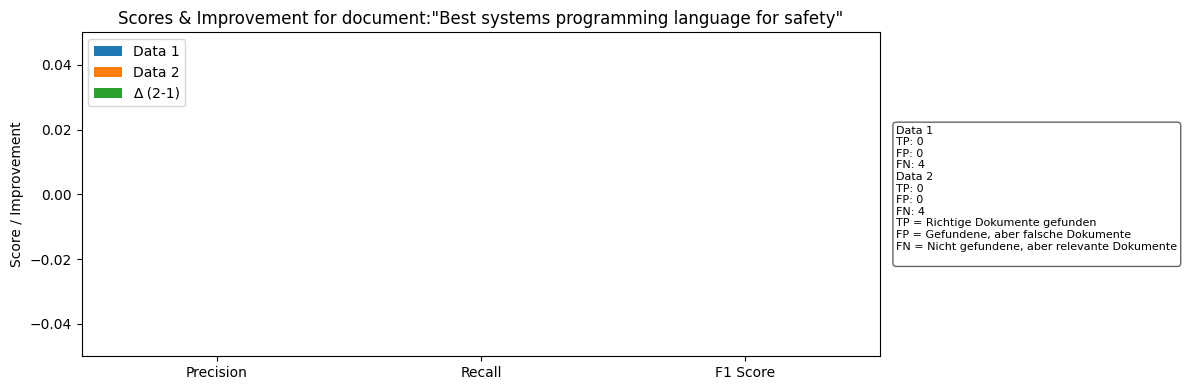

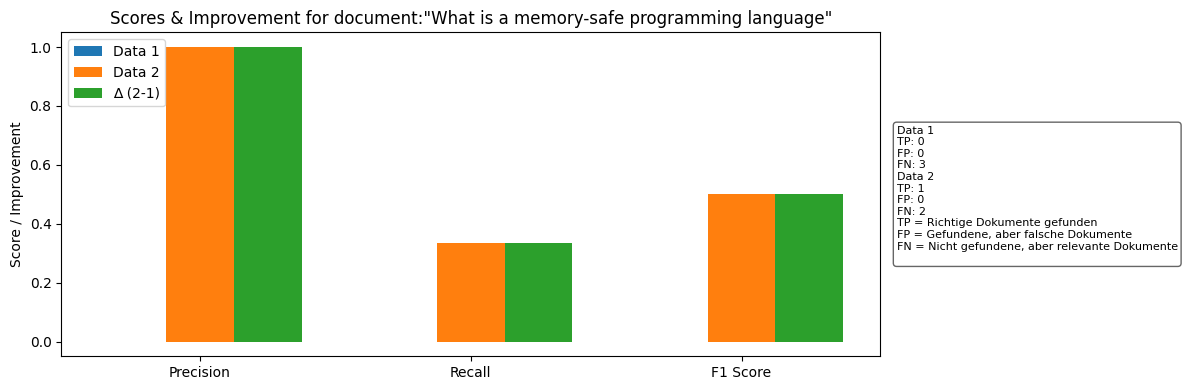

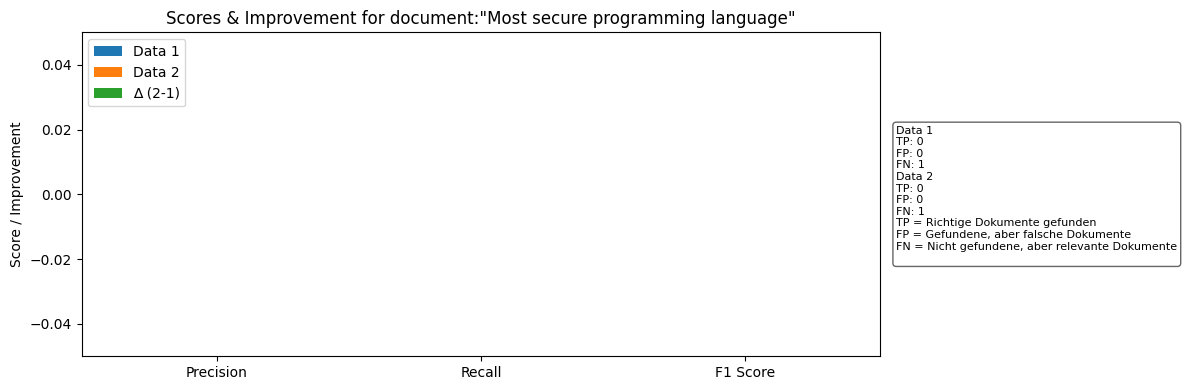

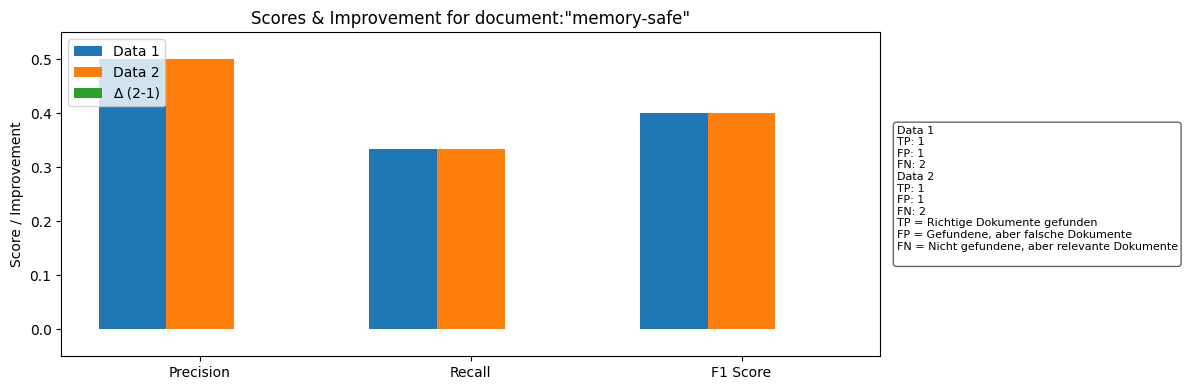

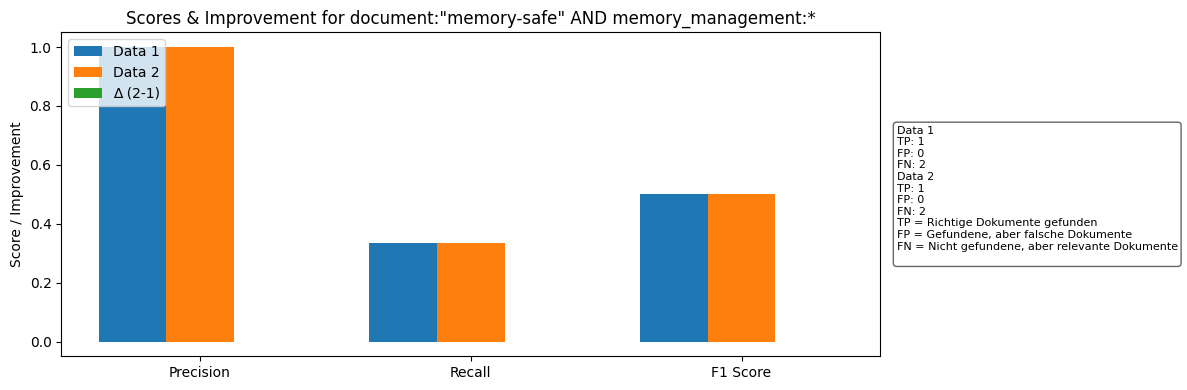

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# --- Adapter: Gruppiere results nach core ---
from collections import defaultdict

grouped = defaultdict(list)
for r in results:
    grouped[r["core"]].append(r)

# Gehe davon aus, dass genau zwei Cores da sind:
core_names = list(grouped.keys())
if len(core_names) != 2:
    raise ValueError("Erwarte genau 2 Cores, gefunden: " + ", ".join(core_names))

core1, core2 = core_names[0], core_names[1]
data1 = grouped[core1]
data2 = grouped[core2]

# Convert lists to dicts keyed by name
d1 = {d["name"]: d for d in data1}
d2 = {d["name"]: d for d in data2}

# Metrics and their labels
metrics = ["s1_pre", "s1_rec", "s1_f1"]
labels = ["Precision", "Recall", "F1 Score"]

# Plot improvement for each name
for name in d1:
    # raw scores + diff
    v1 = [d1[name][m] for m in metrics]
    v2 = [d2[name][m] for m in metrics]
    diff = [b - a for a, b in zip(v1, v2)]

    # build the plot
    x = np.arange(len(metrics))
    width = 0.25
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.bar(x - width,   v1,   width, label="Data 1")
    ax.bar(x,           v2,   width, label="Data 2")
    ax.bar(x + width,   diff, width, label="∆ (2-1)")

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(
        min(min(diff), 0) - 0.05,
        max(v1 + v2 + diff) + 0.05
    )
    ax.set_ylabel("Score / Improvement")
    ax.set_title(f"Scores & Improvement for {name}")
    ax.legend(loc="upper left")

    # pull out TP/FP/FN from dataset 1 (or 2) and make the little comment box
    tp1, fp1, fn1 = d1[name]["tp"], d1[name]["fp"], d1[name]["fn"]
    tp2, fp2, fn2 = d2[name]["tp"], d2[name]["fp"], d2[name]["fn"]
    comment = (
        "Data 1\n"
        f"TP: {tp1}\n"
        f"FP: {fp1}\n"
        f"FN: {fn1}\n"
        "Data 2\n"
        f"TP: {tp2}\n"
        f"FP: {fp2}\n"
        f"FN: {fn2}\n"
        "TP = Richtige Dokumente gefunden\n"
        "FP = Gefundene, aber falsche Dokumente\n"
        "FN = Nicht gefundene, aber relevante Dokumente\n"
    )
    # place text to the right of the axes
    ax.text(1.02, 0.5, comment,
            transform=ax.transAxes,
            va="center", ha="left", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="#666"))

    plt.tight_layout()
    plt.show()

Number of cores found: 2
Core names: ['ProgLang24', 'ProgLang24_2']
Total unique query names: 29
Queries available in all cores: 29
Processing query: BaseExceptiontitle:Python3.12
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


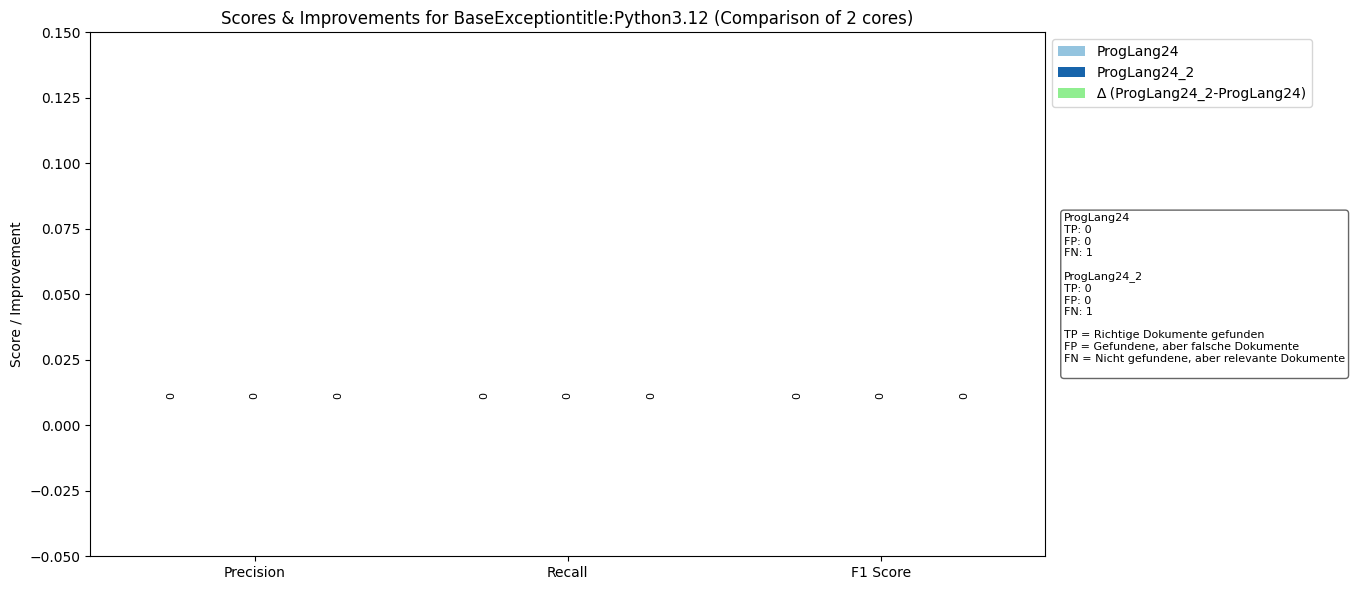

Processing query: document:"Best coding languages for building websites"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


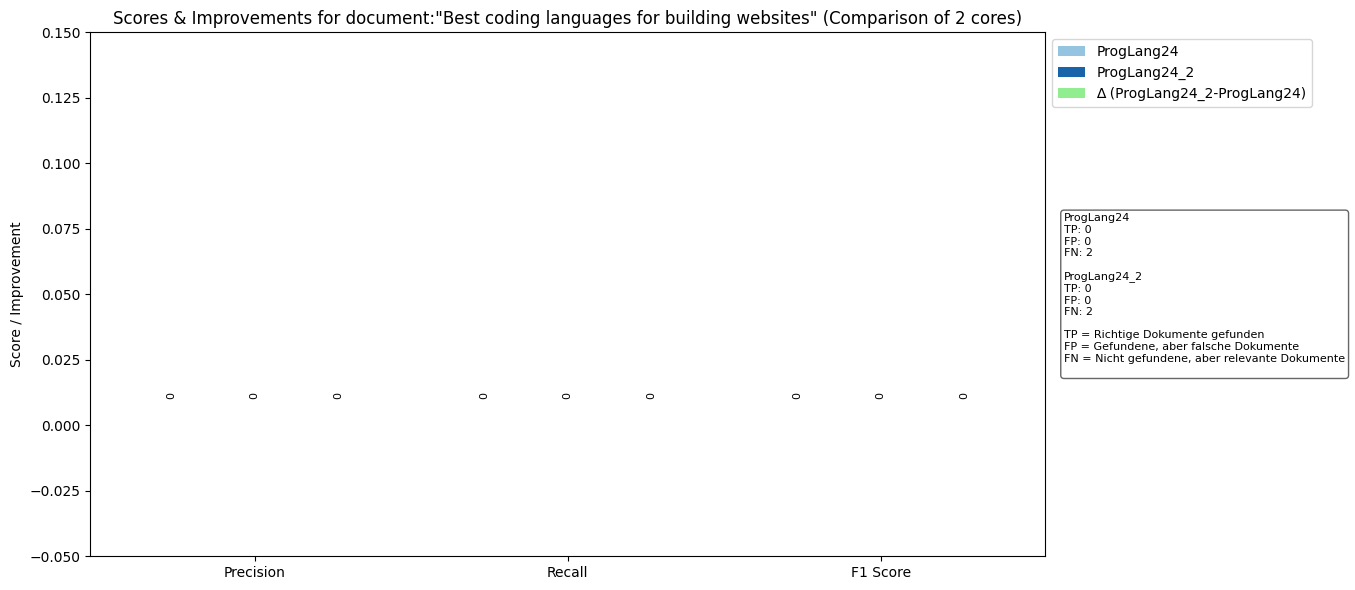

Processing query: document:"Best programming language for web development"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


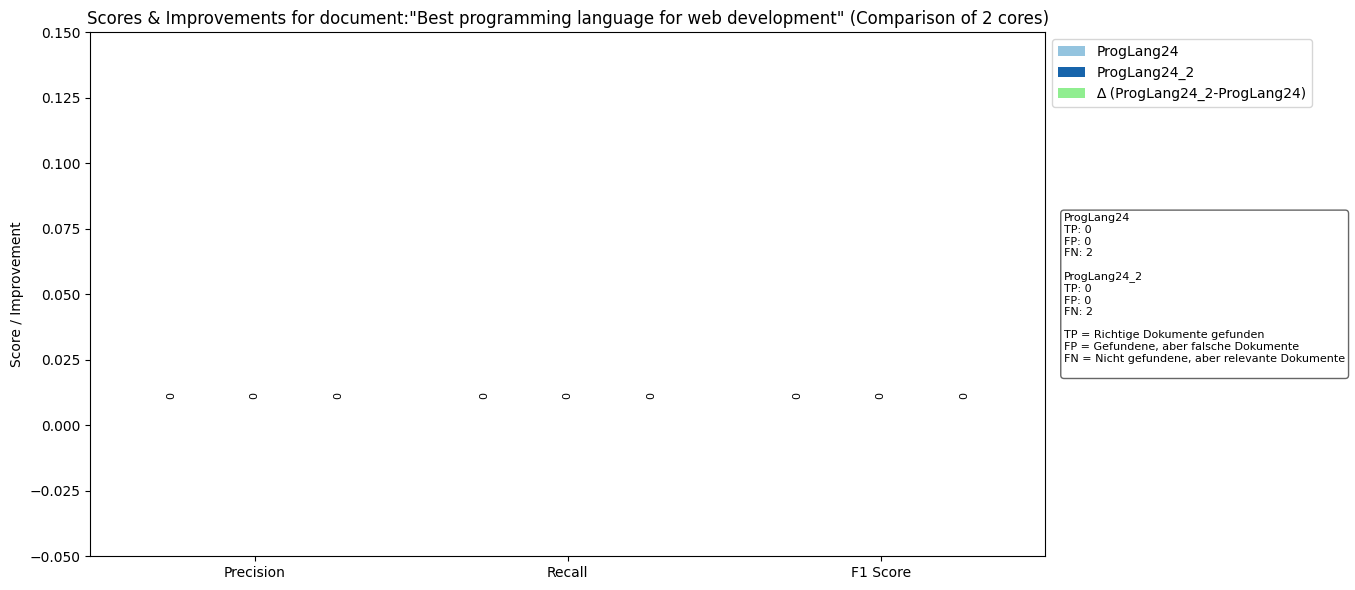

Processing query: document:"Best systems programming language for safety"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


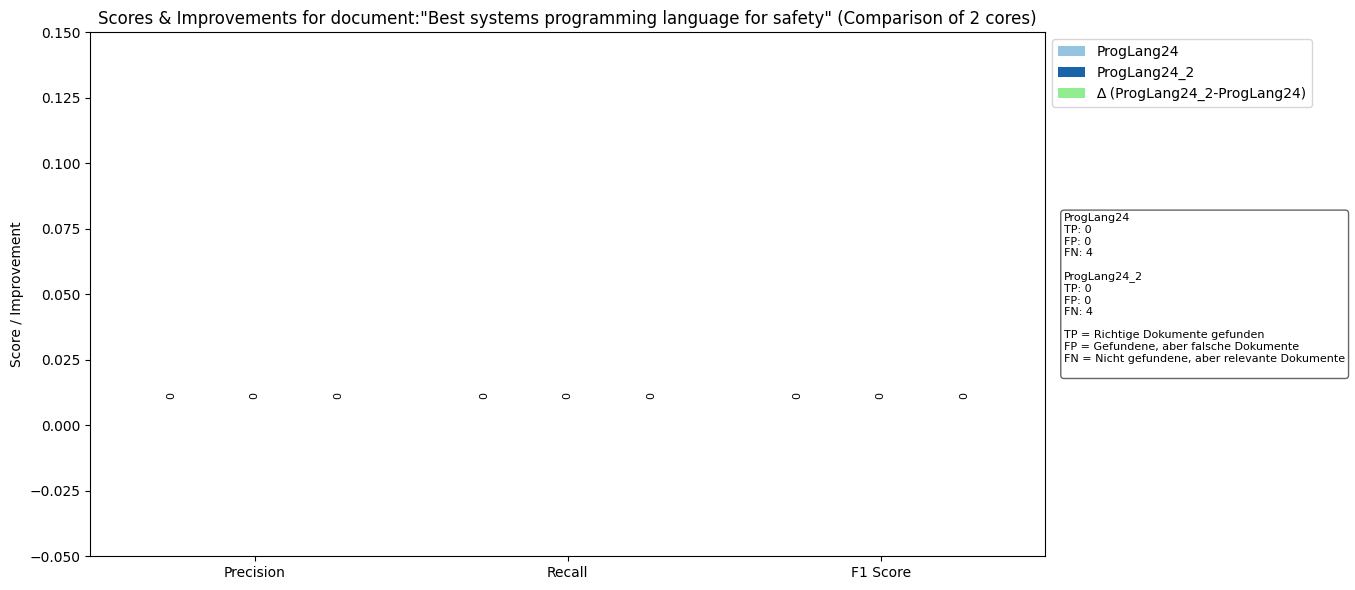

Processing query: document:"JavaScript framework"
  ProgLang24 values: [0.6666666666666666, 1.0, 0.8]
  ProgLang24_2 values: [0.6666666666666666, 1.0, 0.8]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


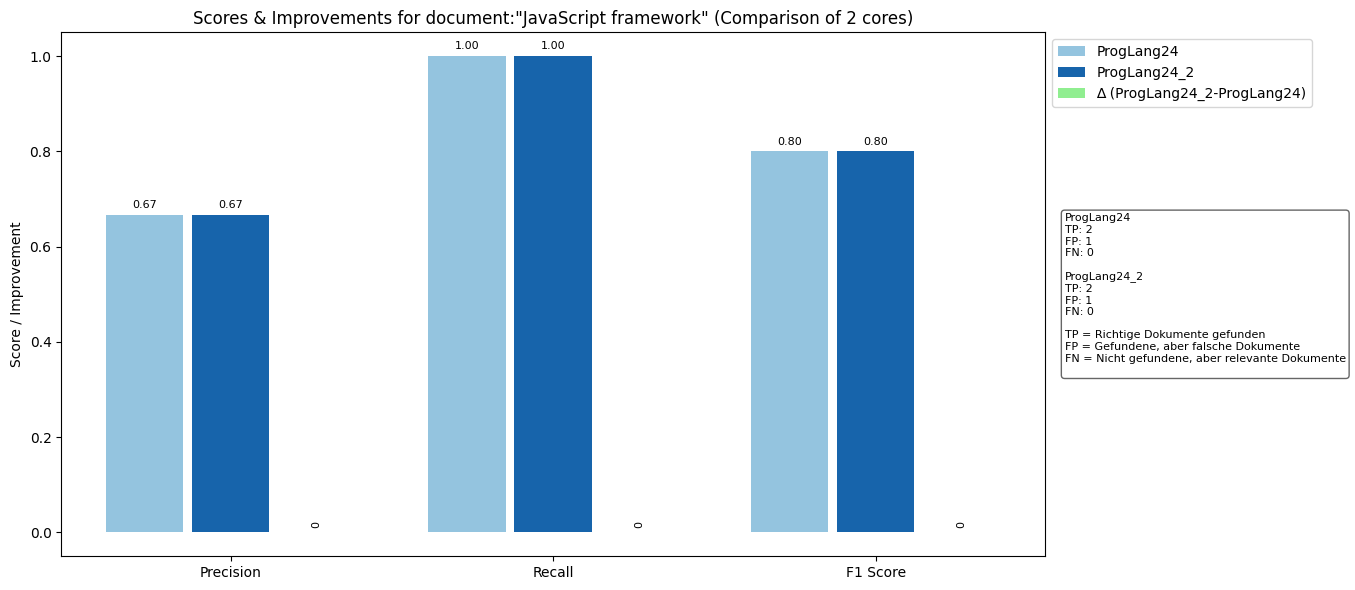

Processing query: document:"Javascrit framework"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


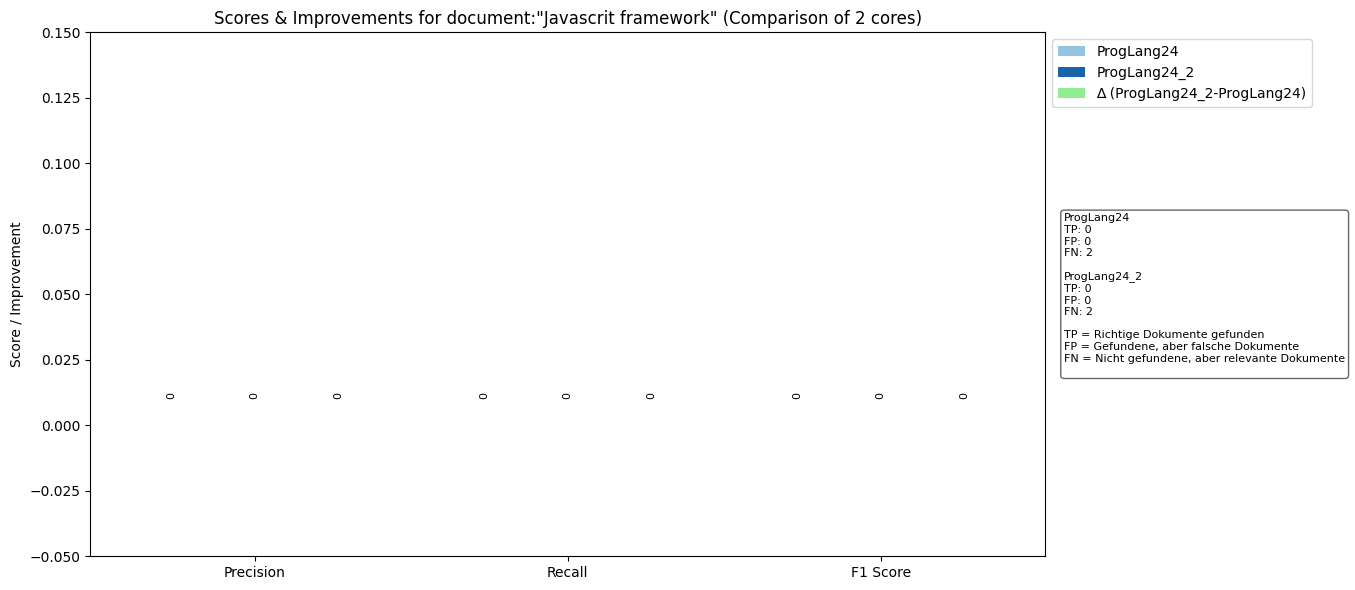

Processing query: document:"Most secure programming language"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


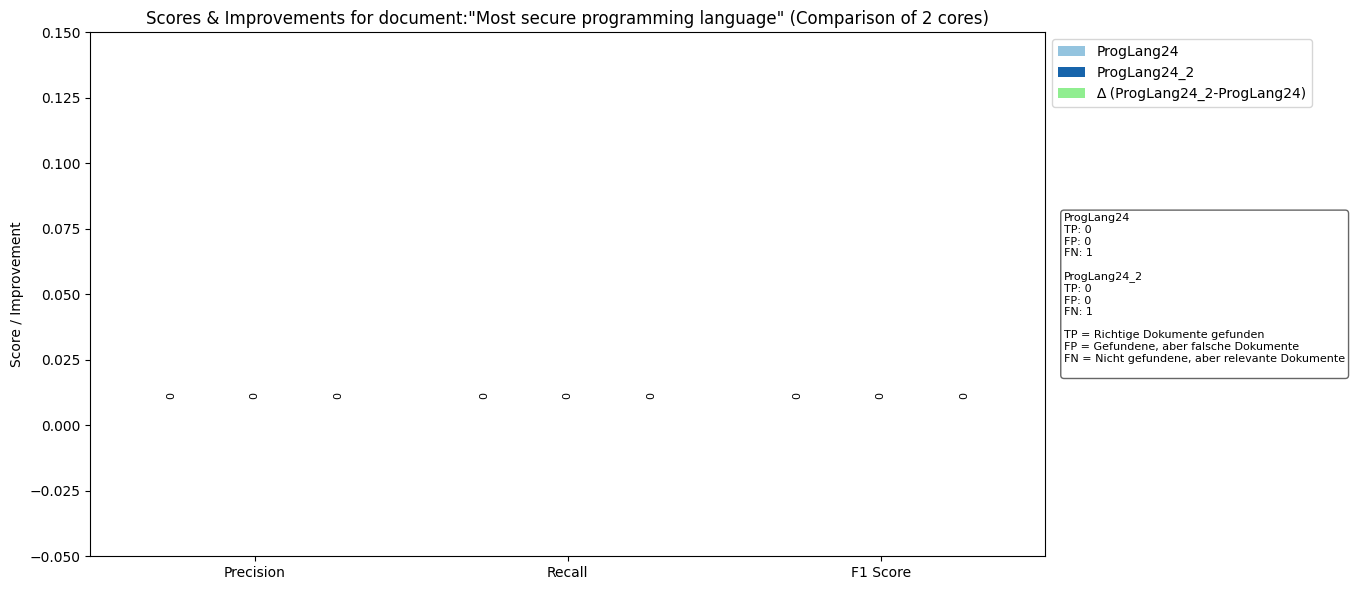

Processing query: document:"Top programming languages for web development"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


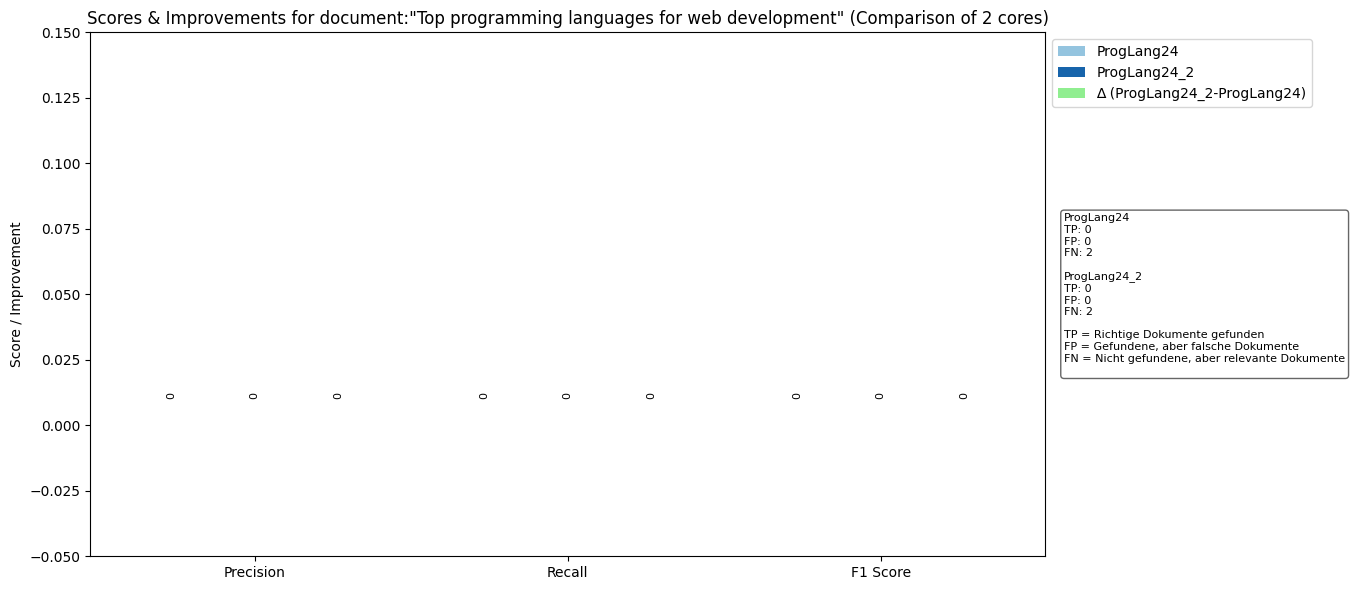

Processing query: document:"What is a memory-safe programming language"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [1.0, 0.3333333333333333, 0.5]
  Diff ProgLang24_2-ProgLang24: [1.0, 0.3333333333333333, 0.5]


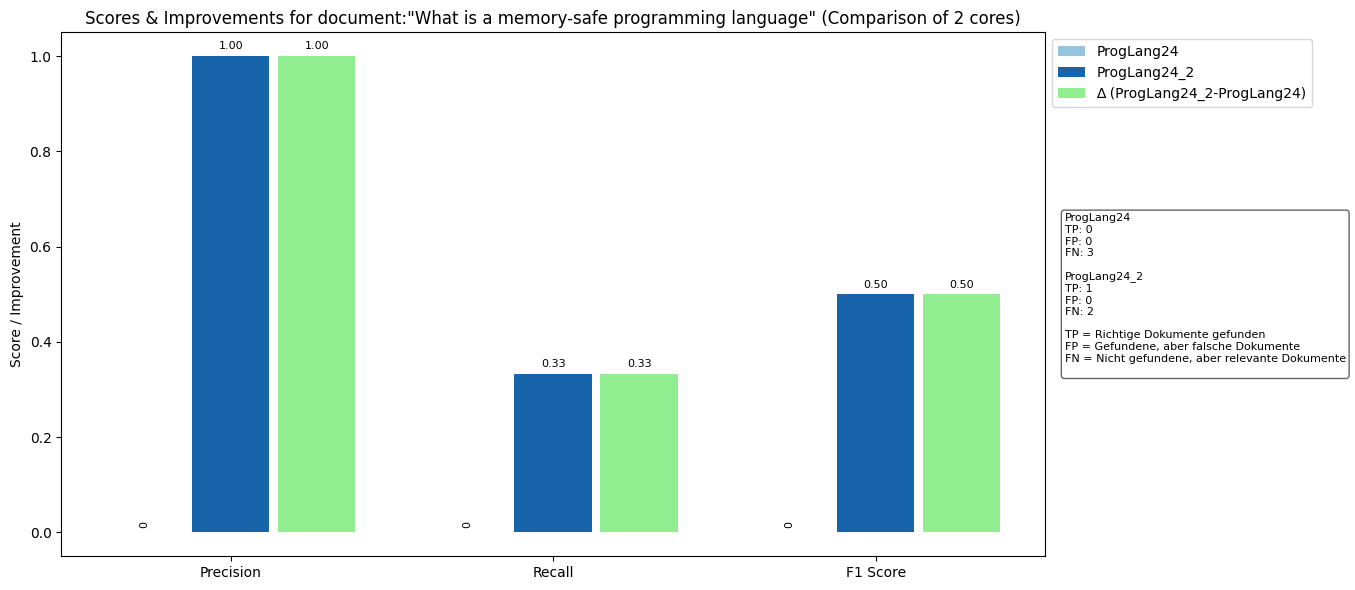

Processing query: document:"What is the best programming language for web development"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0, 0.0, 0]
  Diff ProgLang24_2-ProgLang24: [0, 0.0, 0]


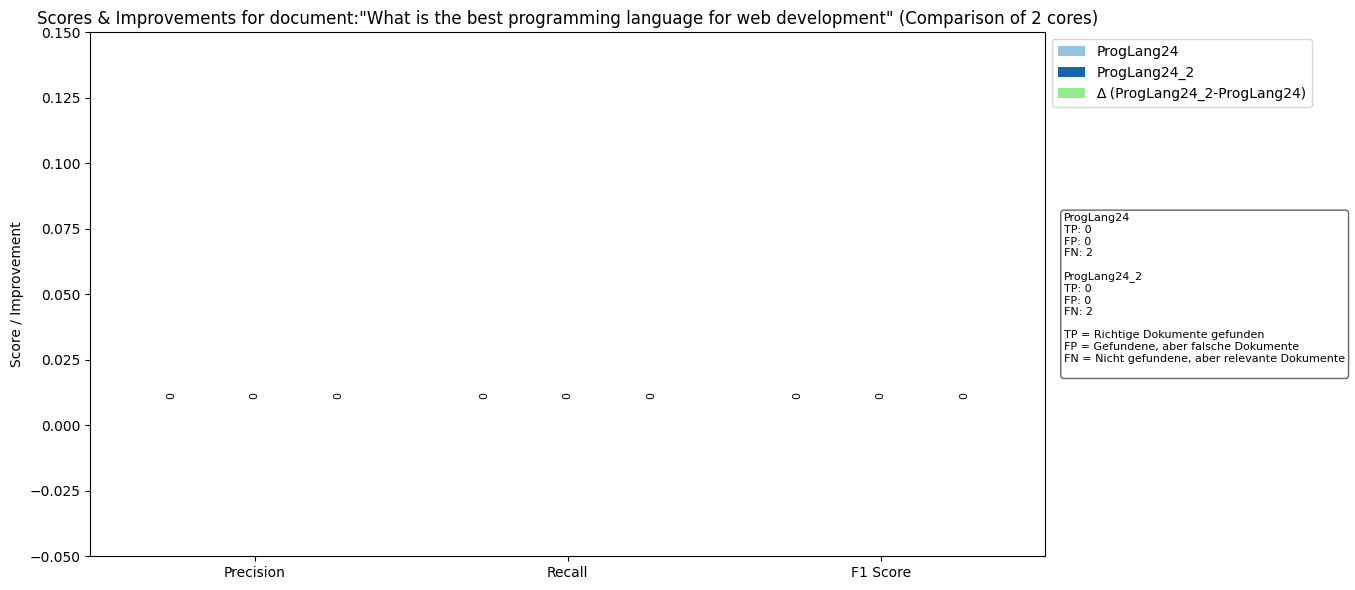

Processing query: document:"functional" AND NOT document:"object-oriented"
  ProgLang24 values: [0.4, 0.15384615384615385, 0.2222222222222222]
  ProgLang24_2 values: [1.0, 0.15384615384615385, 0.2666666666666667]
  Diff ProgLang24_2-ProgLang24: [0.6, 0.0, 0.04444444444444451]


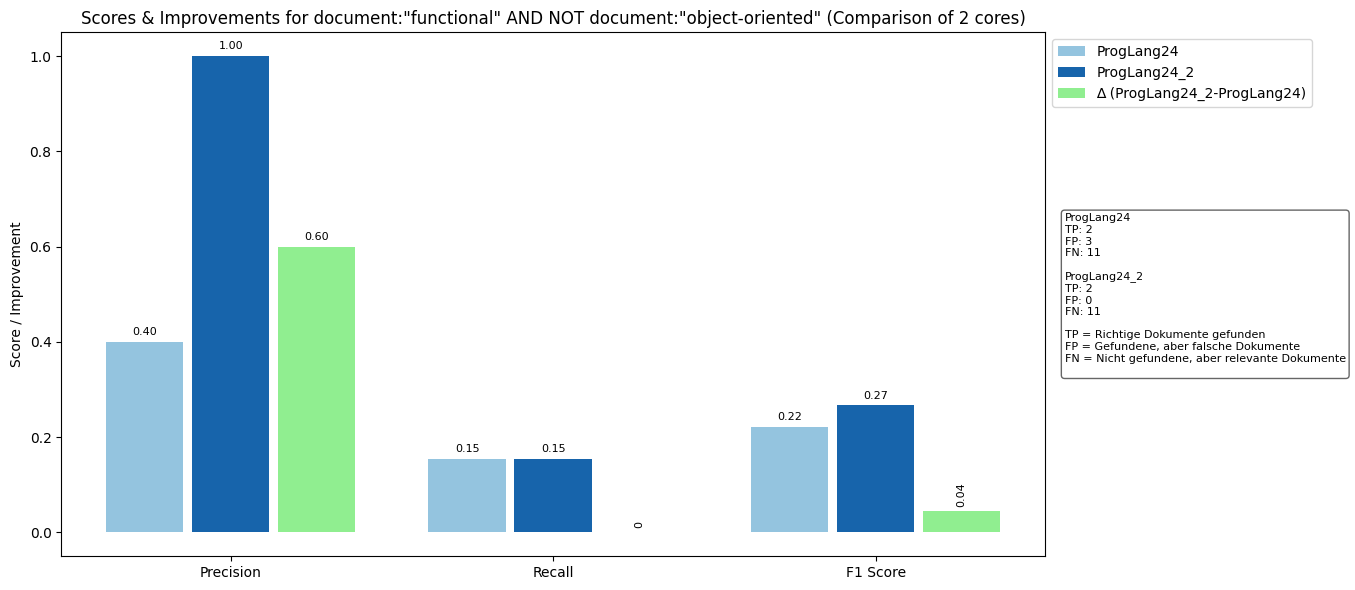

Processing query: document:"memory-safe"
  ProgLang24 values: [0.5, 0.3333333333333333, 0.4]
  ProgLang24_2 values: [0.5, 0.3333333333333333, 0.4]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


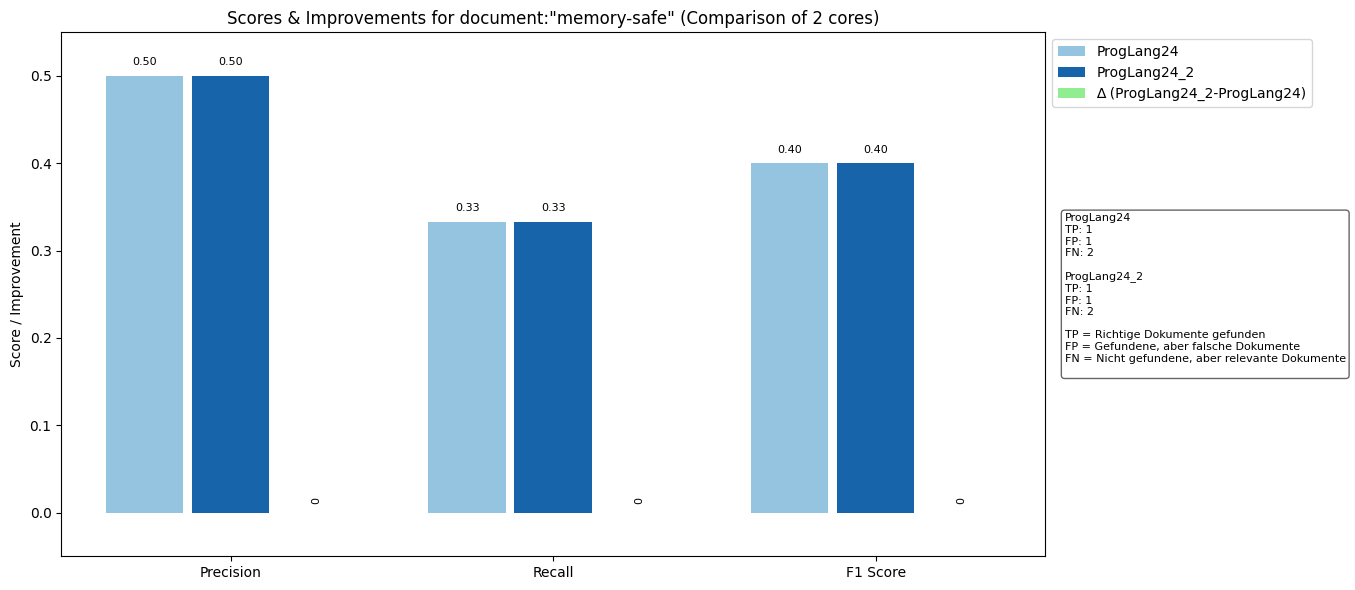

Processing query: document:"memory-safe" AND memory_management:*
  ProgLang24 values: [1.0, 0.3333333333333333, 0.5]
  ProgLang24_2 values: [1.0, 0.3333333333333333, 0.5]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


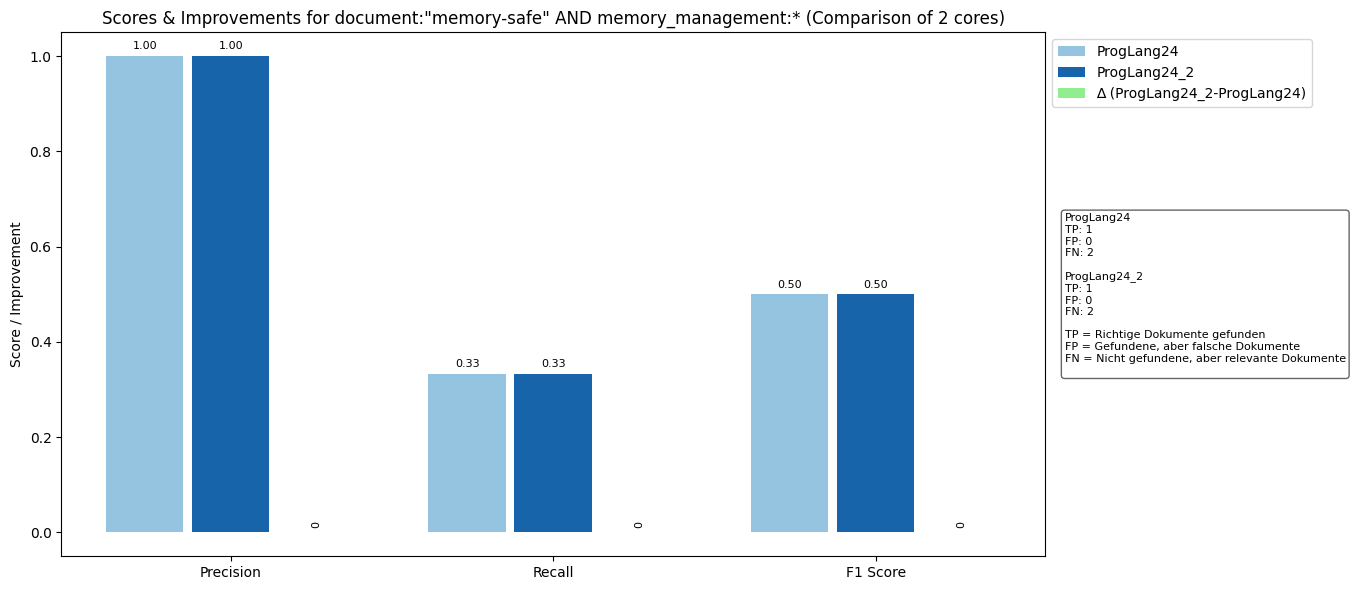

Processing query: document:"modern programming languages"
  ProgLang24 values: [1.0, 0.125, 0.2222222222222222]
  ProgLang24_2 values: [1.0, 0.125, 0.2222222222222222]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


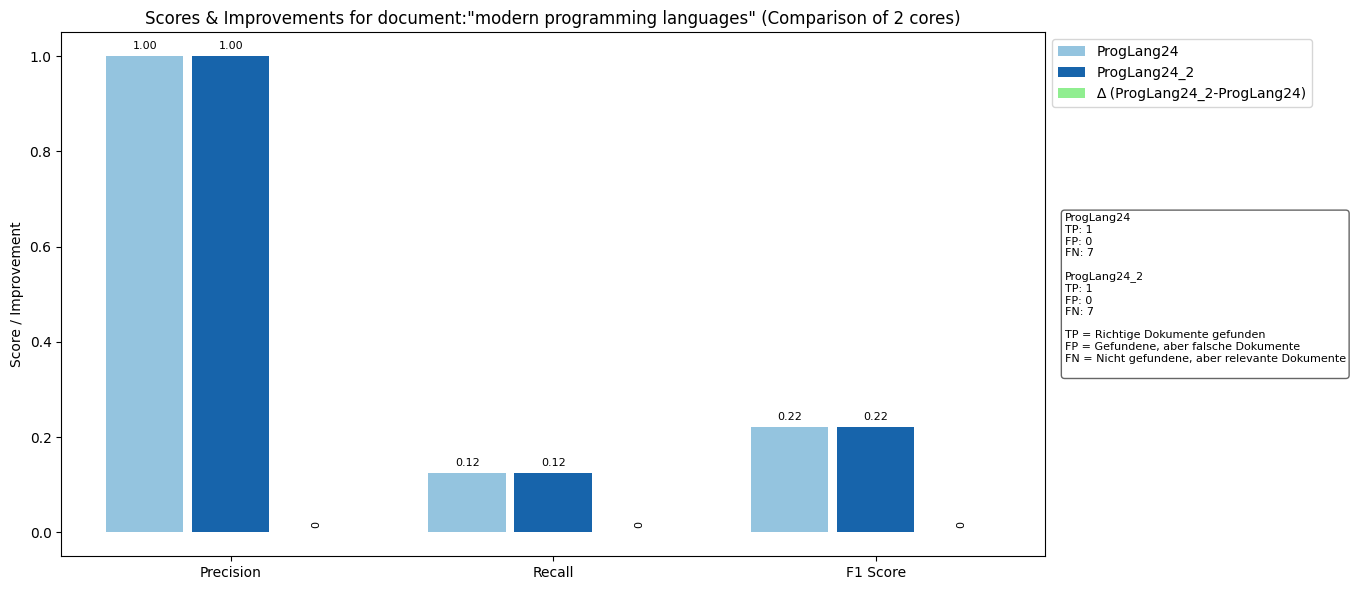

Processing query: document:"most modern programming languages"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [1.0, 0.125, 0.2222222222222222]
  Diff ProgLang24_2-ProgLang24: [1.0, 0.125, 0.2222222222222222]


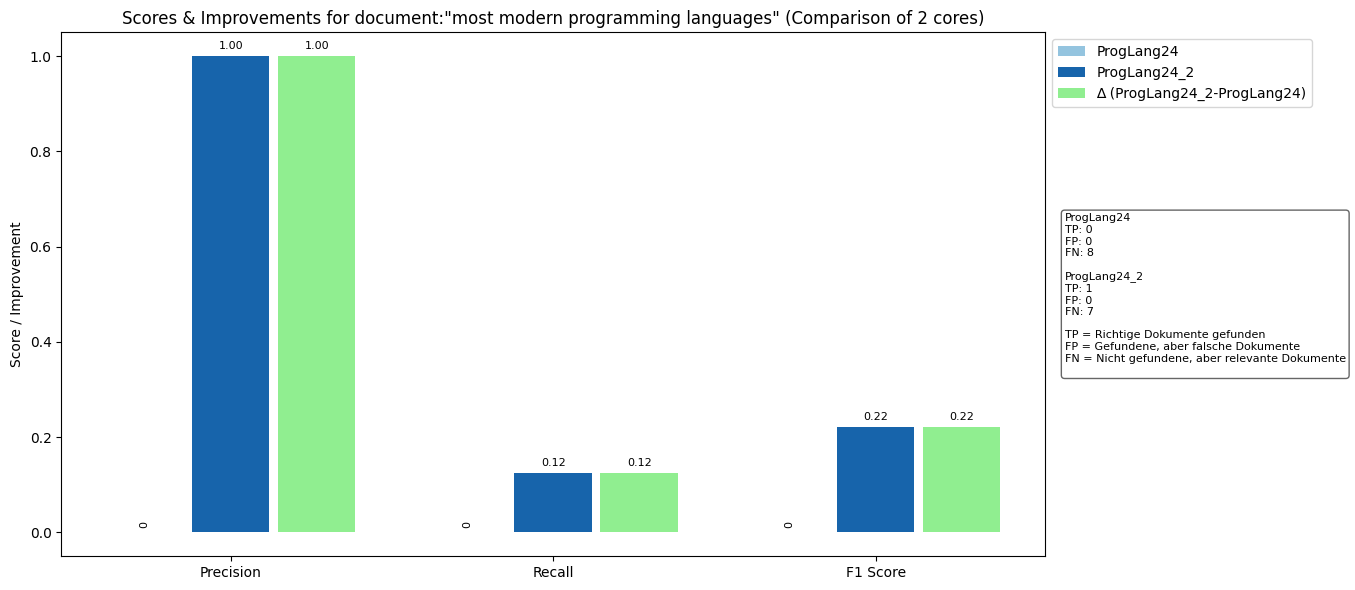

Processing query: document:"object-oriented" AND NOT document:"functional"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [0.5, 0.11764705882352941, 0.19047619047619047]
  Diff ProgLang24_2-ProgLang24: [0.5, 0.11764705882352941, 0.19047619047619047]


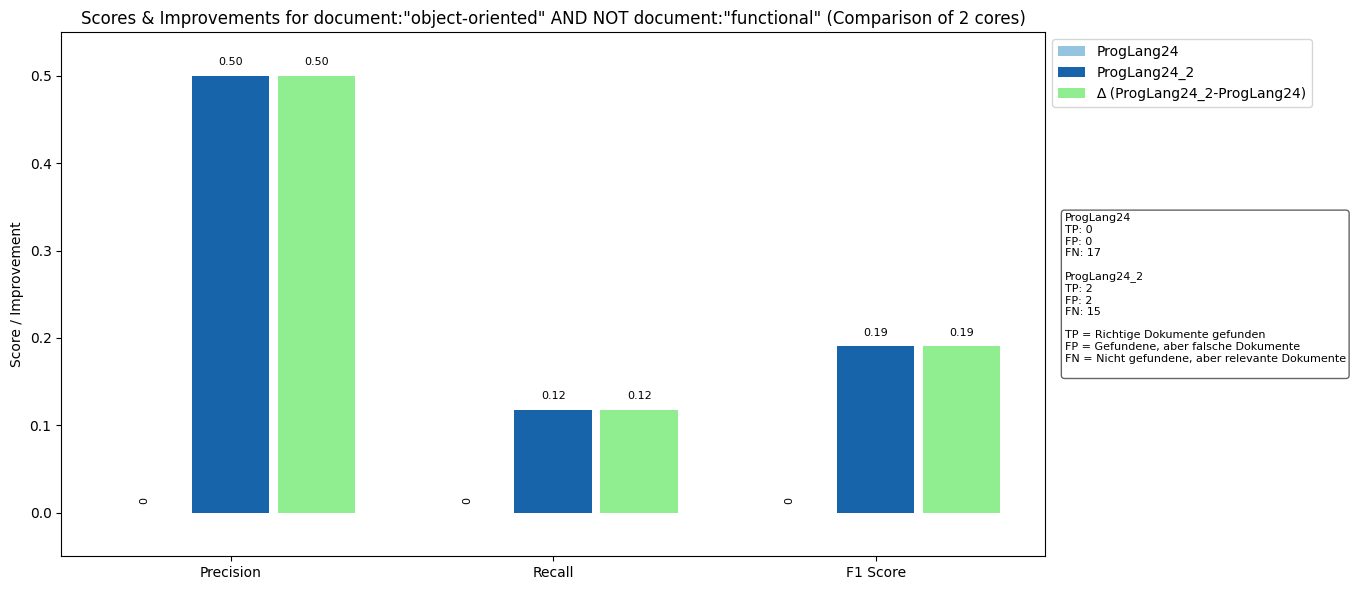

Processing query: document:"trendy programming languages"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [1.0, 0.125, 0.2222222222222222]
  Diff ProgLang24_2-ProgLang24: [1.0, 0.125, 0.2222222222222222]


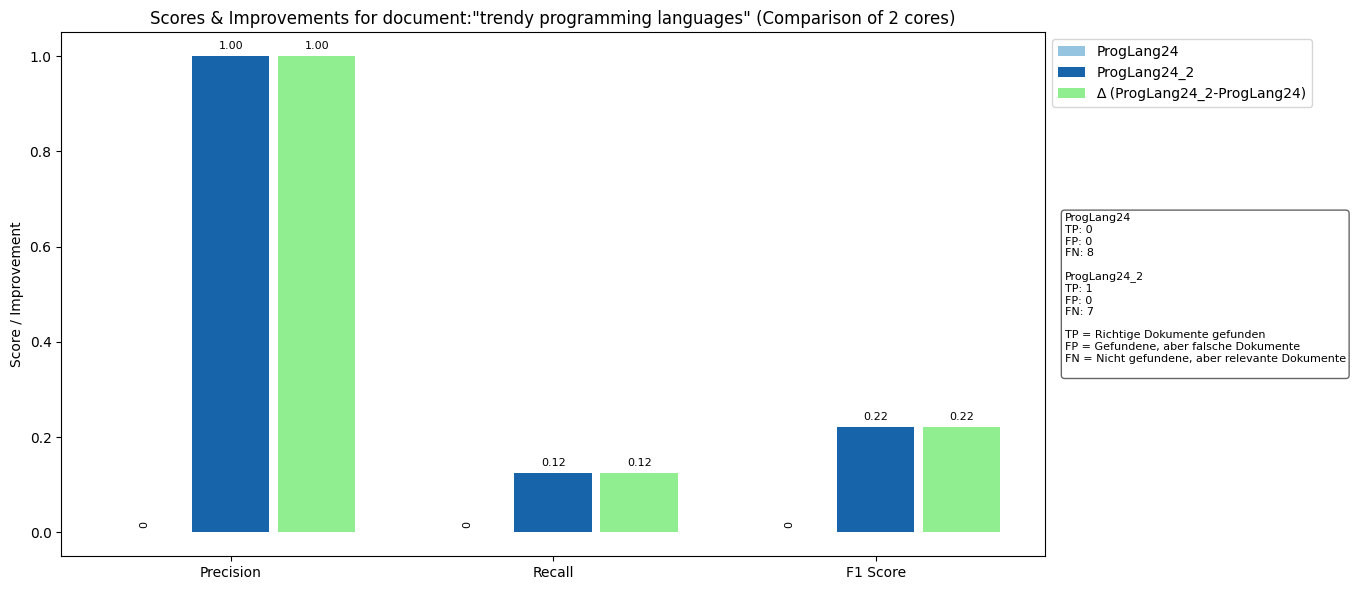

Processing query: document:declarative
  ProgLang24 values: [0.47619047619047616, 0.7692307692307693, 0.588235294117647]
  ProgLang24_2 values: [0.7058823529411765, 0.9230769230769231, 0.8000000000000002]
  Diff ProgLang24_2-ProgLang24: [0.22969187675070035, 0.15384615384615385, 0.2117647058823532]


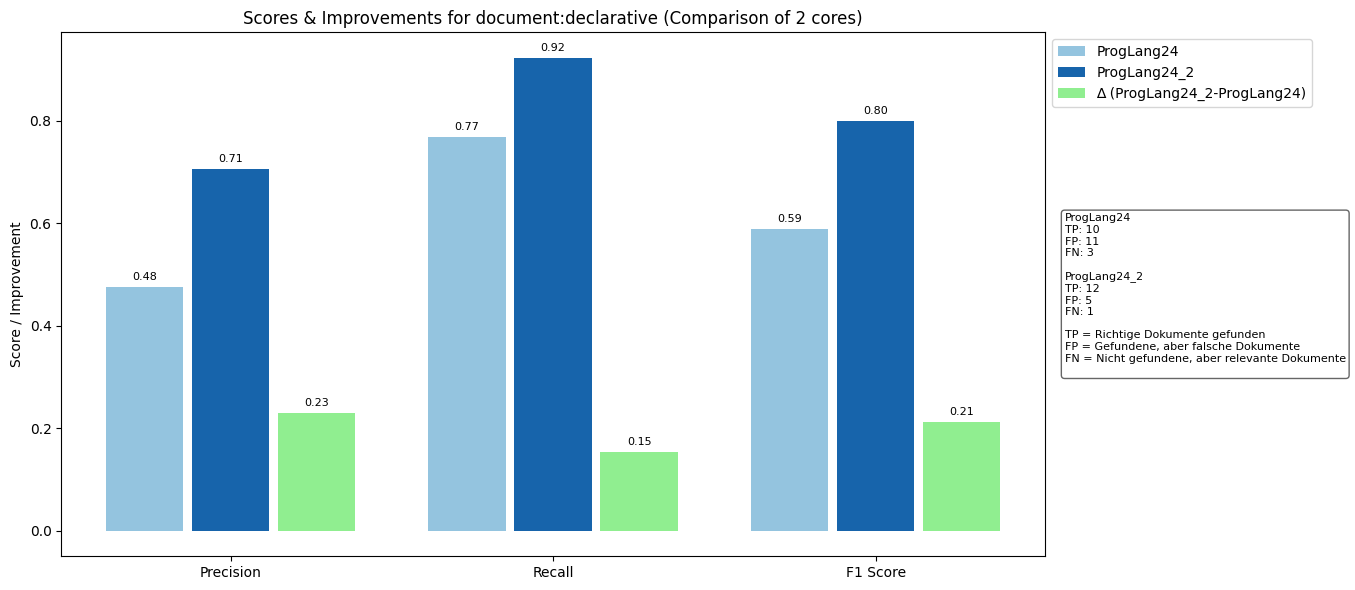

Processing query: document:functional
  ProgLang24 values: [0.5416666666666666, 1.0, 0.7027027027027027]
  ProgLang24_2 values: [0.7058823529411765, 0.9230769230769231, 0.8000000000000002]
  Diff ProgLang24_2-ProgLang24: [0.1642156862745099, -0.07692307692307687, 0.09729729729729741]


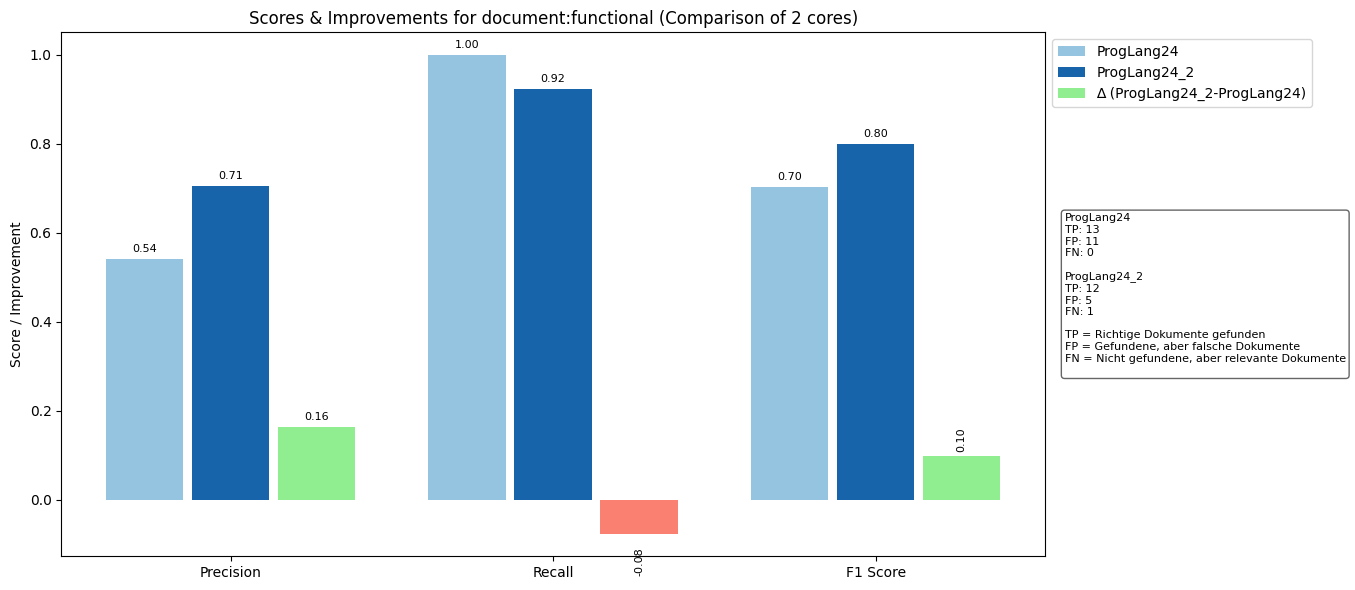

Processing query: document:imperative
  ProgLang24 values: [0.75, 0.35294117647058826, 0.48]
  ProgLang24_2 values: [0.7142857142857143, 0.29411764705882354, 0.4166666666666667]
  Diff ProgLang24_2-ProgLang24: [-0.0357142857142857, -0.05882352941176472, -0.0633333333333333]


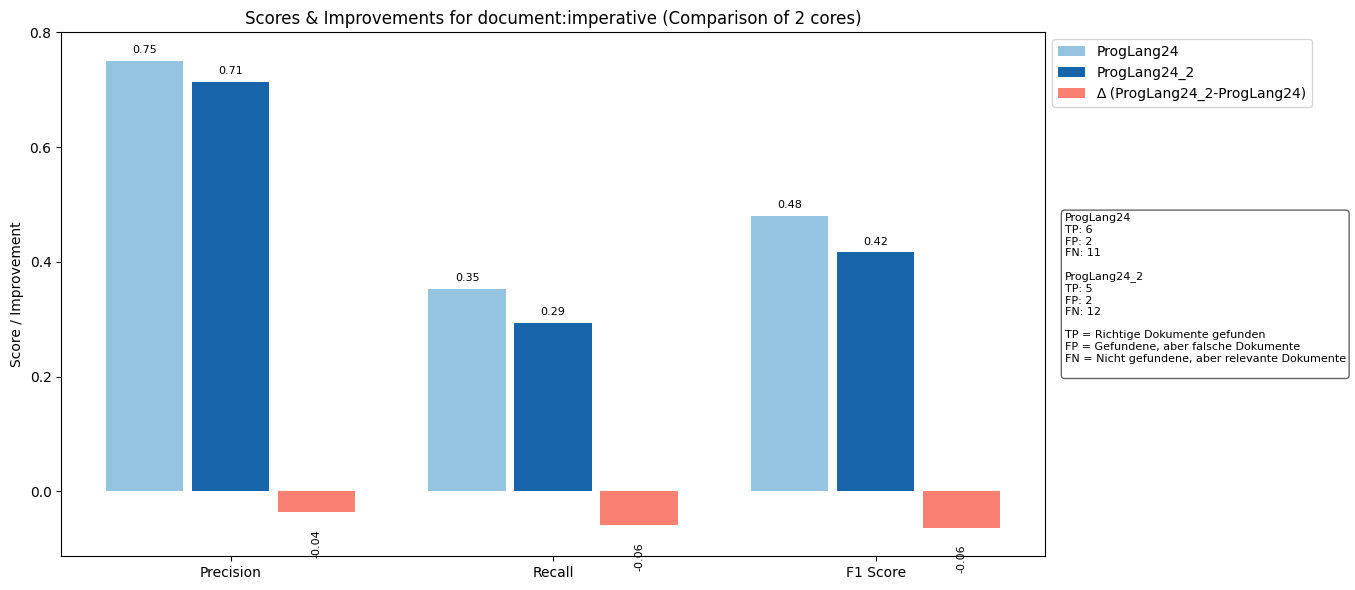

Processing query: document:object-oriented
  ProgLang24 values: [0.6666666666666666, 0.9411764705882353, 0.7804878048780487]
  ProgLang24_2 values: [0.6666666666666666, 0.9411764705882353, 0.7804878048780487]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


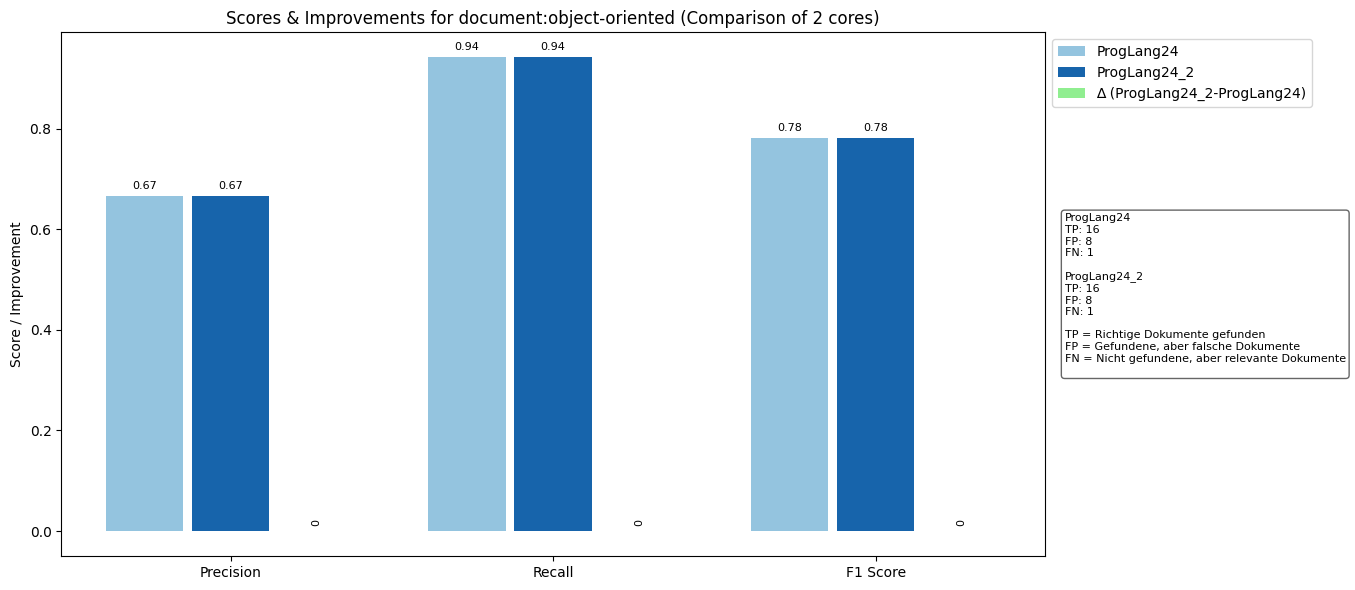

Processing query: title:"C Sharp"
  ProgLang24 values: [1.0, 1.0, 1.0]
  ProgLang24_2 values: [1.0, 1.0, 1.0]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


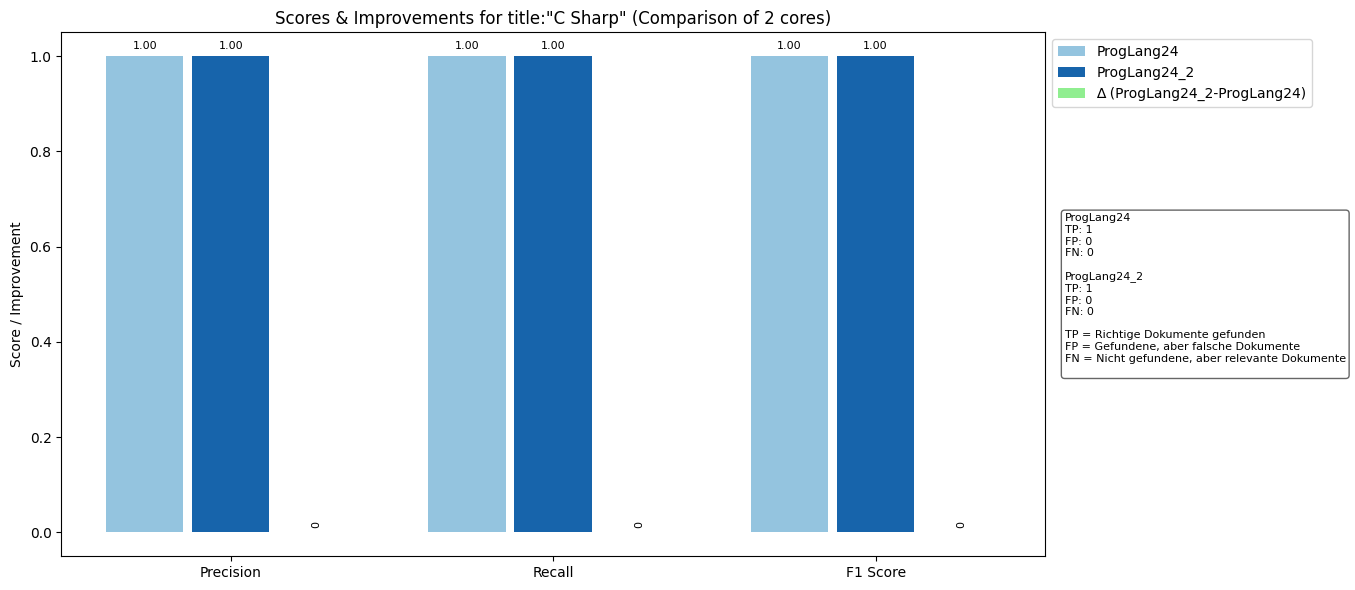

Processing query: title:"C plus plus"
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [1.0, 0.5, 0.6666666666666666]
  Diff ProgLang24_2-ProgLang24: [1.0, 0.5, 0.6666666666666666]


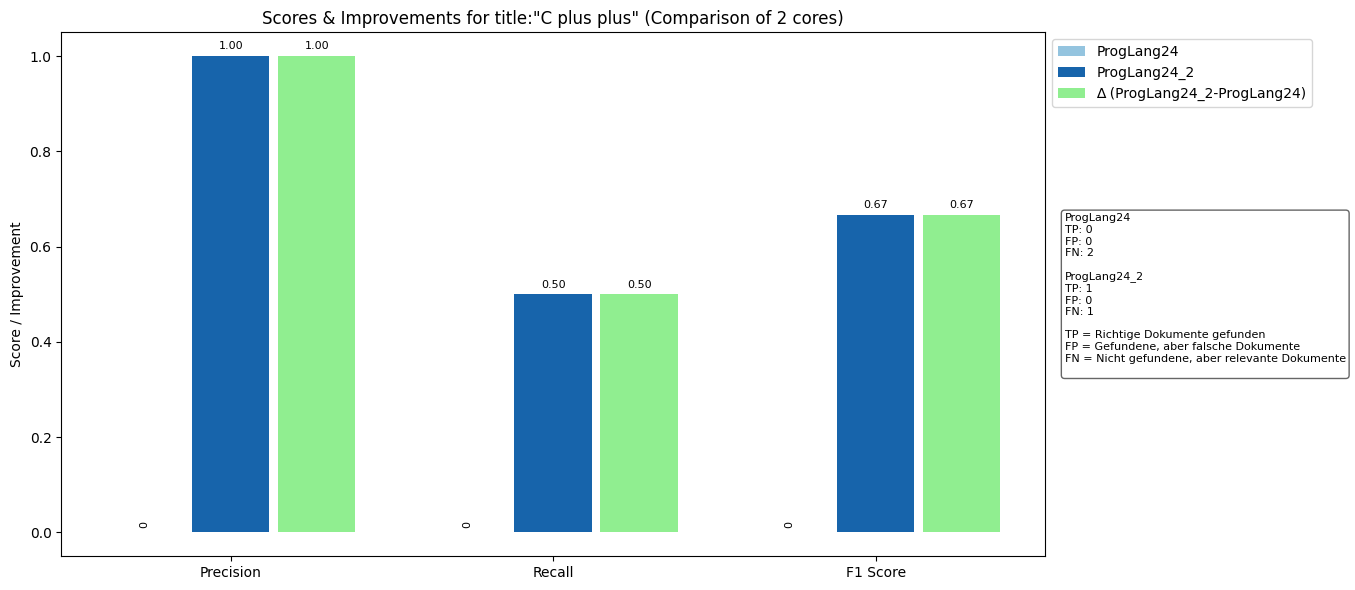

Processing query: title:C#
  ProgLang24 values: [0.3333333333333333, 1.0, 0.5]
  ProgLang24_2 values: [1.0, 1.0, 1.0]
  Diff ProgLang24_2-ProgLang24: [0.6666666666666667, 0.0, 0.5]


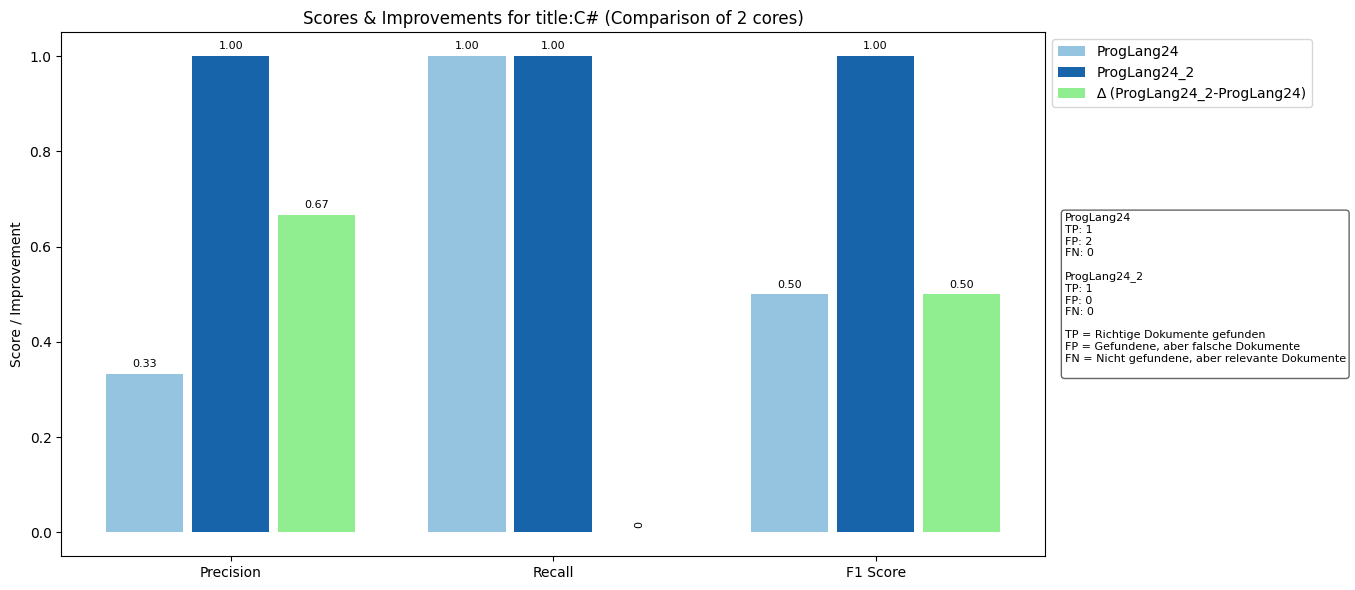

Processing query: title:C++
  ProgLang24 values: [0.6666666666666666, 1.0, 0.8]
  ProgLang24_2 values: [1.0, 0.5, 0.6666666666666666]
  Diff ProgLang24_2-ProgLang24: [0.33333333333333337, -0.5, -0.13333333333333341]


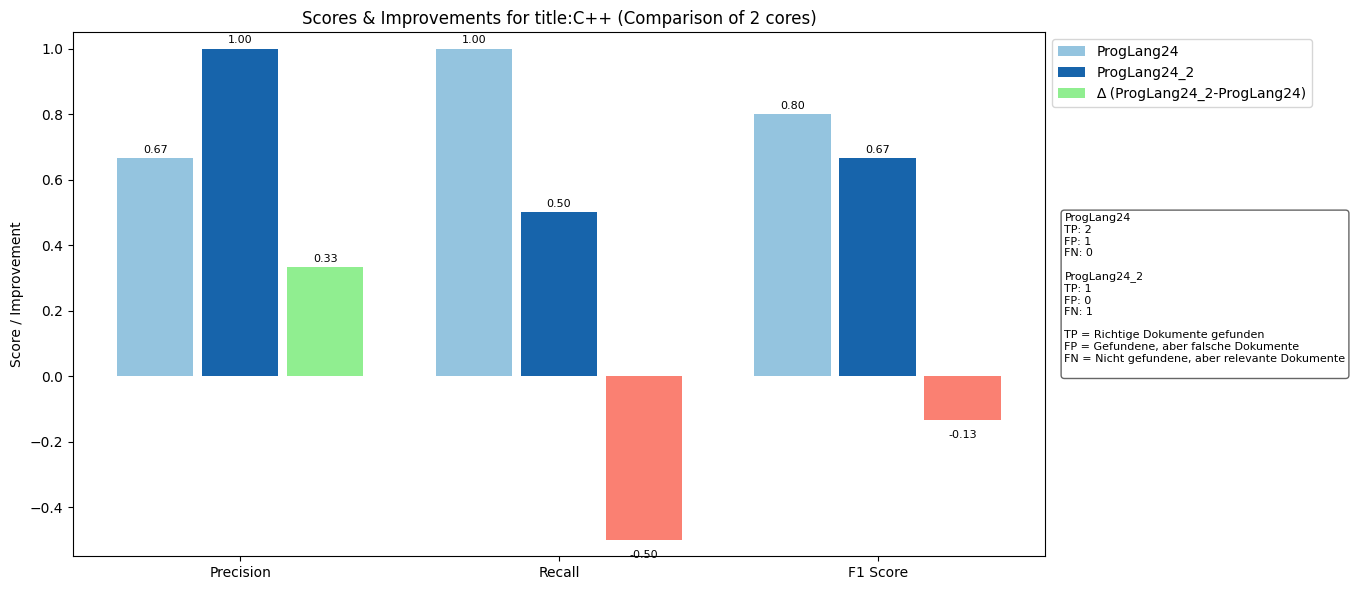

Processing query: title:Go
  ProgLang24 values: [1.0, 1.0, 1.0]
  ProgLang24_2 values: [1.0, 1.0, 1.0]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


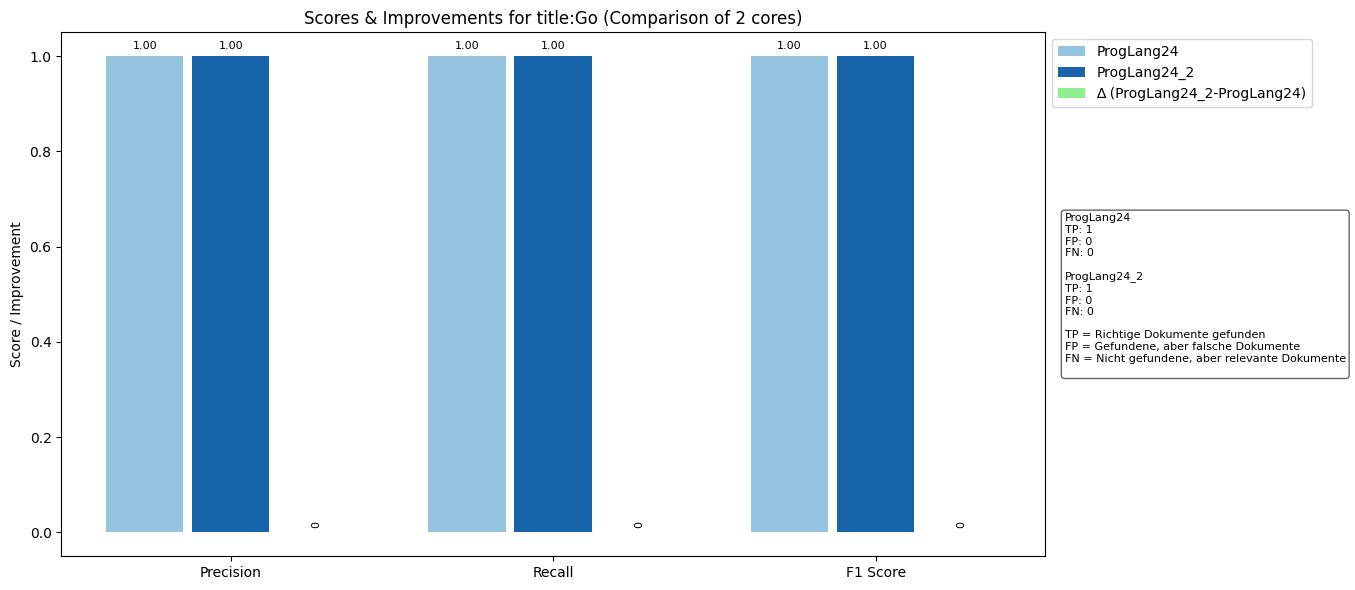

Processing query: title:Golang
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [1.0, 1.0, 1.0]
  Diff ProgLang24_2-ProgLang24: [1.0, 1.0, 1.0]


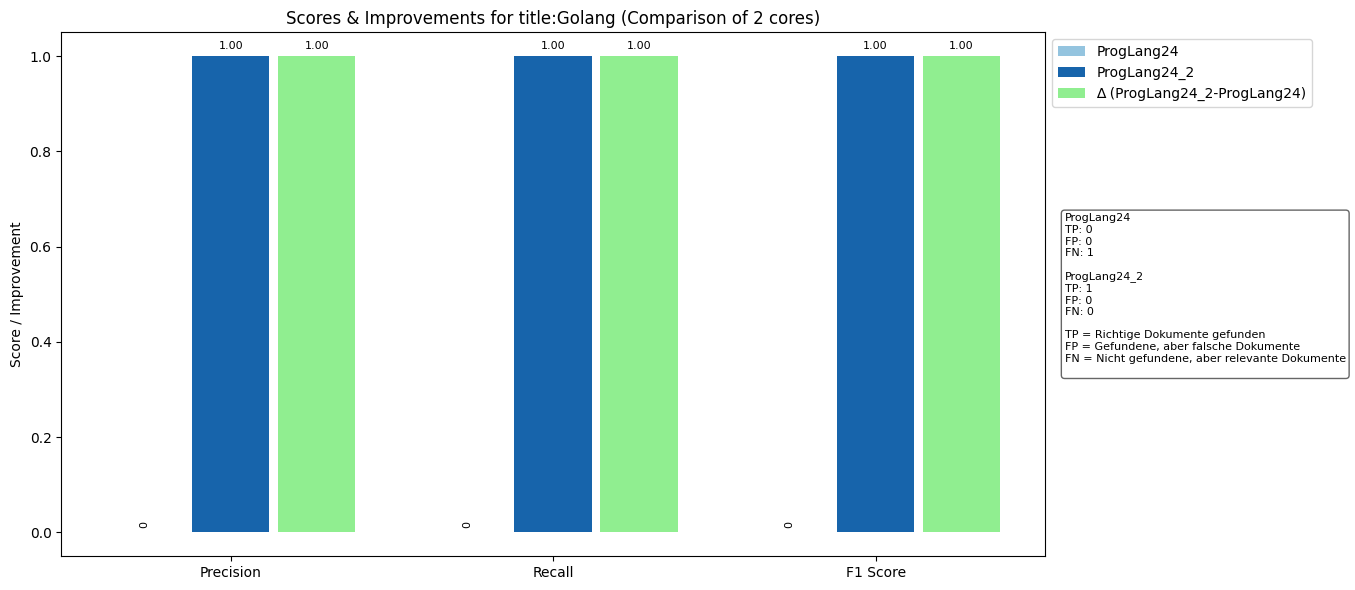

Processing query: title:Python
  ProgLang24 values: [1.0, 1.0, 1.0]
  ProgLang24_2 values: [1.0, 1.0, 1.0]
  Diff ProgLang24_2-ProgLang24: [0.0, 0.0, 0.0]


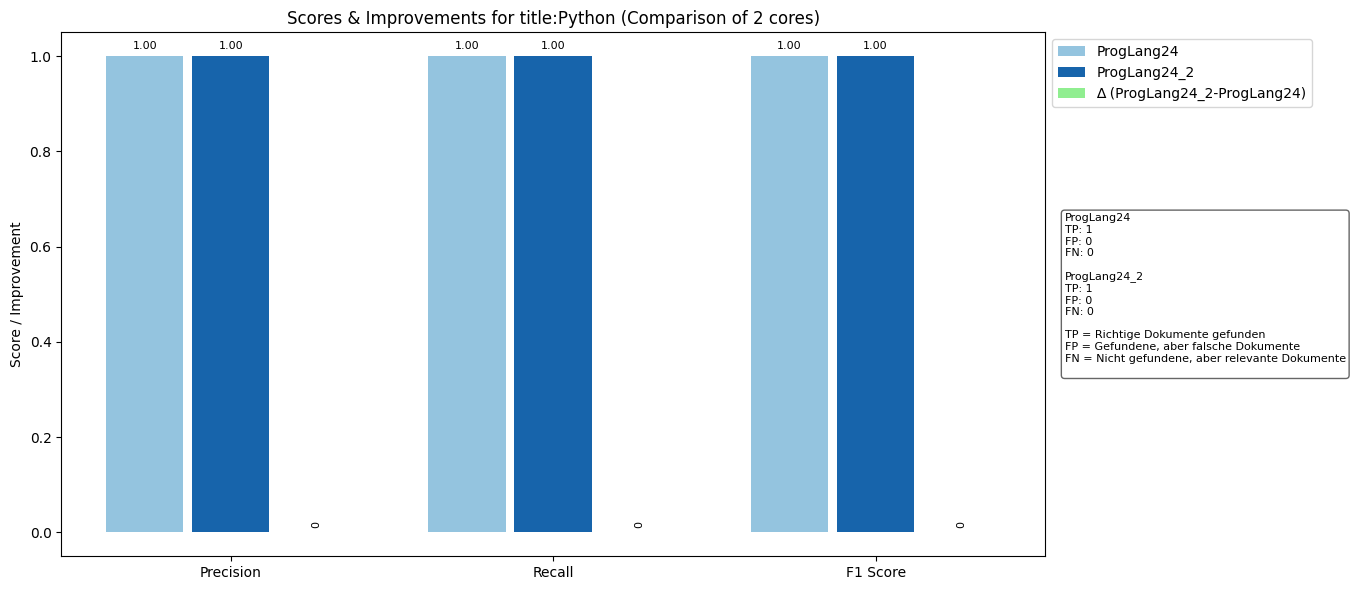

Processing query: title:Python3
  ProgLang24 values: [0, 0.0, 0]
  ProgLang24_2 values: [1.0, 1.0, 1.0]
  Diff ProgLang24_2-ProgLang24: [1.0, 1.0, 1.0]


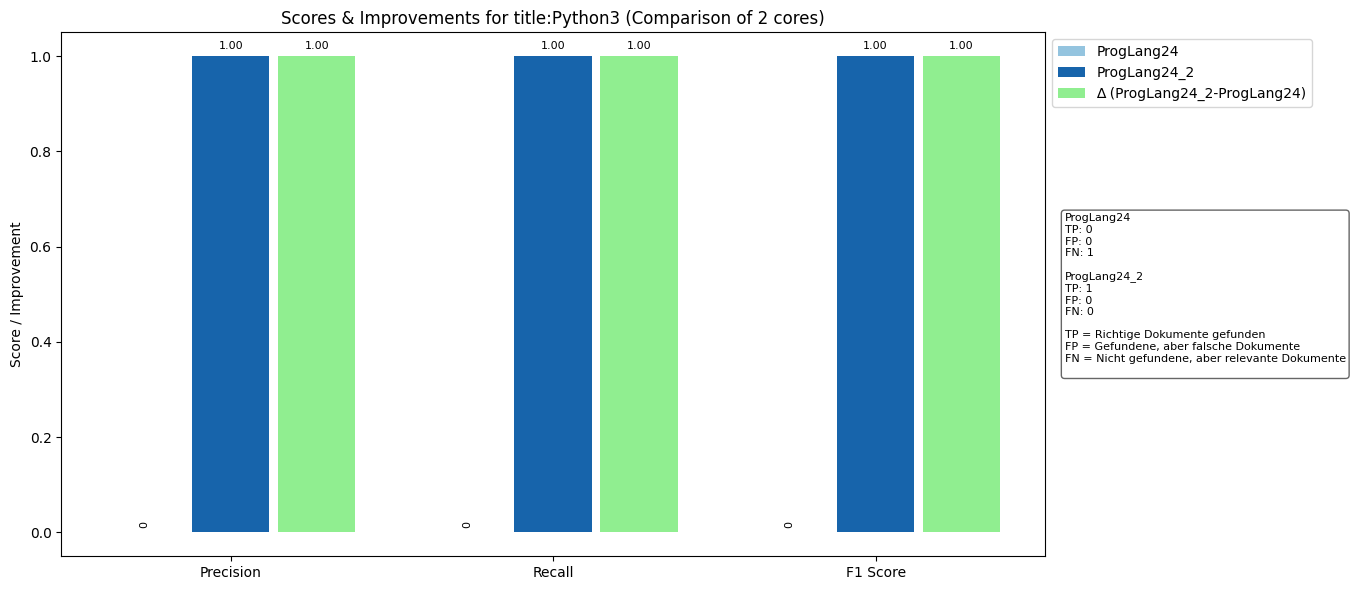

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap

# --- Adapter: Gruppiere results nach core ---
grouped = defaultdict(list)
for r in results:
    grouped[r["core"]].append(r)
    
# Debug info
print(f"Number of cores found: {len(grouped)}")
print(f"Core names: {sorted(grouped.keys())}")

core_names = sorted(grouped.keys())
results_sets = [(core, grouped[core]) for core in core_names]

# Erzeuge ein Dictionary pro Core, damit wir einfach auf die Daten zugreifen können.
results_dicts = []
for (core, data) in results_sets:
    results_dicts.append({d["name"]: d for d in data})

# Metrics and their labels
metrics = ["s1_pre", "s1_rec", "s1_f1"]
labels = ["Precision", "Recall", "F1 Score"]

# Get all unique query names
all_names = set()
for result_dict in results_dicts:
    all_names.update(result_dict.keys())

# Debug info
print(f"Total unique query names: {len(all_names)}")

# Count how many charts we'll create
valid_queries = [name for name in sorted(all_names) 
                if all(name in result_dict for result_dict in results_dicts)]
print(f"Queries available in all cores: {len(valid_queries)}")

# For each query, create a chart with all cores
for name in sorted(all_names):
    # Skip if the query doesn't exist in all cores
    if not all(name in result_dict for result_dict in results_dicts):
        print(f"Skipping query '{name}' because it's not in all cores")
        continue
    
    # Debug info for this query
    print(f"Processing query: {name}")
    
    # Number of cores and differences
    n_cores = len(core_names)
    n_diffs = n_cores - 1
    total_bars = n_cores + n_diffs
    
    # Get metrics for each core
    core_values = []
    for i, result_dict in enumerate(results_dicts):
        values = [result_dict[name][m] for m in metrics]
        core_values.append(values)
        print(f"  {core_names[i]} values: {values}")
    
    # Calculate differences between consecutive cores
    diffs = []
    for i in range(n_cores - 1):
        diff_values = [after - before for before, after in zip(core_values[i], core_values[i+1])]
        diffs.append(diff_values)
        print(f"  Diff {core_names[i+1]}-{core_names[i]}: {diff_values}")
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Create x positions for bars
    x = np.arange(len(metrics))
    total_width = 0.8  # Total width for all bars for one metric
    bar_width = total_width / total_bars
    
    # Create a colormap for the cores
    core_cmap = plt.cm.Blues(np.linspace(0.4, 0.8, n_cores))
    diff_color = 'lightgreen'  # Color for positive differences
    neg_diff_color = 'salmon'  # Color for negative differences
    
    # Plot core bars
    bars = []
    for i, values in enumerate(core_values):
        offset = i * bar_width - total_width/2 + bar_width/2
        bar = ax.bar(x + offset, values, bar_width * 0.9, label=f"{core_names[i]}", color=core_cmap[i])
        bars.append(bar)
    
    # Plot difference bars
    for i, diff_values in enumerate(diffs):
        offset = (n_cores + i) * bar_width - total_width/2 + bar_width/2
        colors = [diff_color if d >= 0 else neg_diff_color for d in diff_values]
        bar = ax.bar(x + offset, diff_values, bar_width * 0.9, 
                    label=f"∆ ({core_names[i+1]}-{core_names[i]})", color=colors)
        bars.append(bar)
    
    # Set up the axes
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    
    # Find min and max values for y-axis limits
    all_values = [v for sublist in core_values + diffs for v in sublist]
    
    # Make sure y-axis has a reasonable range even if values are all the same
    if all(v == all_values[0] for v in all_values):
        # If all values are the same, create some padding
        y_min = all_values[0] - 0.1 if all_values[0] > 0.1 else 0
        y_max = all_values[0] + 0.1 if all_values[0] < 0.9 else 1.0
    else:
        y_min = min(min(all_values), 0) - 0.05
        y_max = max(max(all_values), 0) + 0.05
    
    # Ensure a minimum range of 0.2 for the y-axis
    if y_max - y_min < 0.2:
        y_mean = (y_max + y_min) / 2
        y_min = y_mean - 0.1
        y_max = y_mean + 0.1
    
    ax.set_ylim(y_min, y_max)
    
    ax.set_ylabel("Score / Improvement")
    ax.set_title(f"Scores & Improvements for {name} (Comparison of {n_cores} cores)")
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    
    # Add a text box with TP, FP, FN data for each core
    comment = ""
    for i, core in enumerate(core_names):
        tp = results_dicts[i][name]["tp"]
        fp = results_dicts[i][name]["fp"]
        fn = results_dicts[i][name]["fn"]
        comment += f"{core}\nTP: {tp}\nFP: {fp}\nFN: {fn}\n\n"
    
    comment += "TP = Richtige Dokumente gefunden\nFP = Gefundene, aber falsche Dokumente\nFN = Nicht gefundene, aber relevante Dokumente\n"
    
    ax.text(1.02, 0.5, comment,
            transform=ax.transAxes,
            va="center", ha="left", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="#666"))
    
    # Add value labels on top of the bars
    for bar_container in bars:
        for bar in bar_container:
            height = bar.get_height()
            value_text = f"{height:.2f}" if height != 0 else "0"
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + 0.01 if height >= 0 else height - 0.03,
                value_text,
                ha='center', va='bottom' if height >= 0 else 'top',
                fontsize=8, rotation=90 if abs(height) < 0.1 else 0
            )
    
    plt.tight_layout()
    plt.subplots_adjust(right=0.75)  # Make room for the legend and text box
    plt.show()